<a href="https://colab.research.google.com/github/pranay2310/AirBnB-bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## Data Exploration

In [230]:
# First all import required Packages for eda
import pandas as pd
import numpy as np
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid",{'grid.linestyle': ''})
sns.set(rc={'figure.figsize':(16.7,8.27)})

## Load the Data for Analysis

In [231]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [232]:
# Define the path where data is kept
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone project/Project on EDA Airbnb/Airbnb NYC 2019.csv')

In [233]:
df.head(2)

id                                name  host_id host_name  \
0  2539  Clean & quiet apt home by the park     2787      John   
1  2595               Skylit Midtown Castle     2845  Jennifer   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355

In [234]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Exploratory Data Analysis


In [235]:
# Before starting of data Analysis, we should know the basic infomartion of Airbnb Dataset such number of rows & columns, datatype we have 

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

For proper visualisation of Nan value . we will use Heatmap

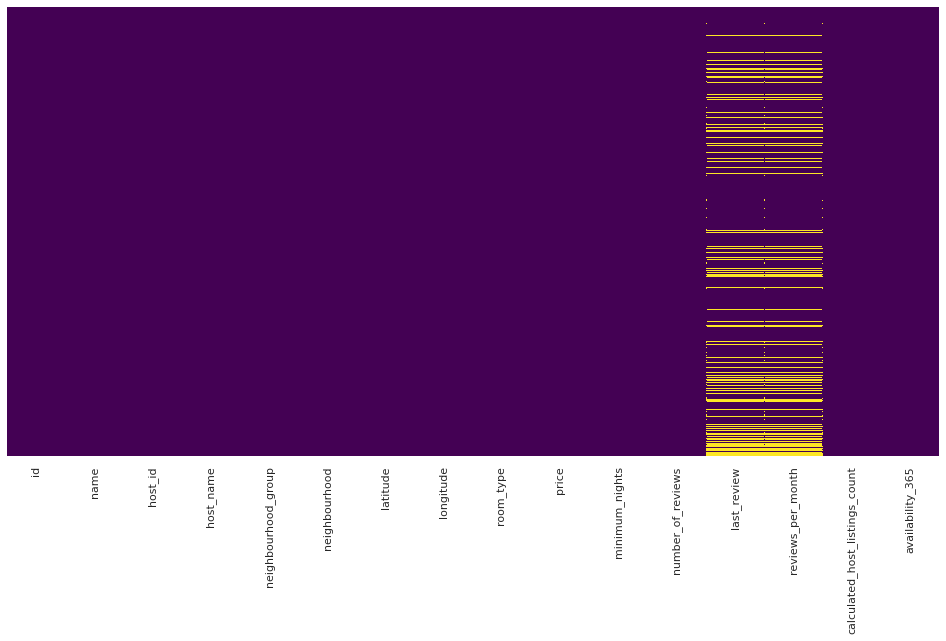

In [237]:
sns.heatmap(df.isnull(),yticklabels= False,cbar = False , cmap='viridis')

After observation of airbnb dataset . we obeserve certain points as follows:
1. There are 48895 rows and 16 columns.
2. Most number of NaN value present in last_review and 'review per_month' column
3. Dataset divide into numerical and catogorical datatype

Missing values present in these two columns  'last_review' and 'review per_month'. So we must be need to do data cleaning and handle missing value before data exploration. 



## Univariant Analysis

In [238]:
airbnb_df_with_na = df.copy()

### column 1. name

this column contain the name (descreption) of the property which the host is giving on rent by which he can draw the customer's attention.

In [239]:
df.name.nunique()

47905

In [240]:
df.host_name.nunique()

11452

In [241]:
df.host_id.nunique()

37457

###column 4. neighbourhood

In [242]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

we can see neighbourhood group has 6 neighbour area. so we will find out which area neighbour area has most number of rooms.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


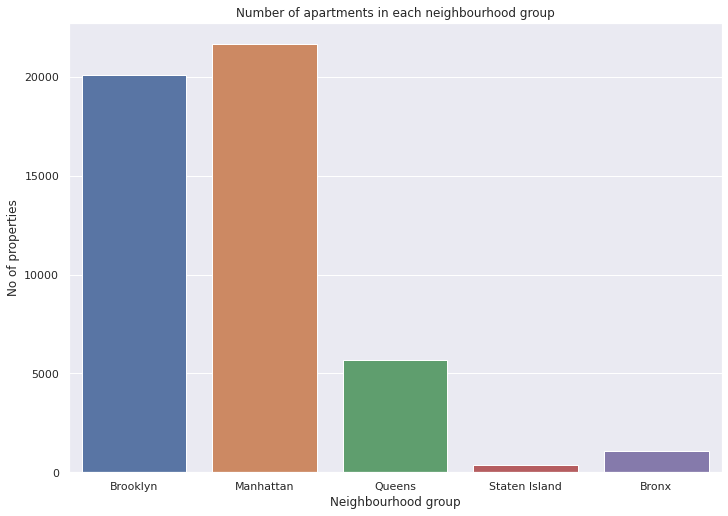

In [243]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(df.neighbourhood_group).set_title("Number of apartments in each neighbourhood group")
plt.ylabel('No of properties')
plt.xlabel('Neighbourhood group')
plt.show()

## Observation
### by the above graph we can observe manhatten has most of the rooms followed by brooklyn and queens

## column no 5. neighbourhood

In [244]:
# find the how many unique value in neighbourhoor column
df.neighbourhood.nunique()

221

there are 221 neighbourhood in these 5 neighbourhood_groups. Therefore we need to find which maximum booking neighbourhood group for their respective nieghbourhood group.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


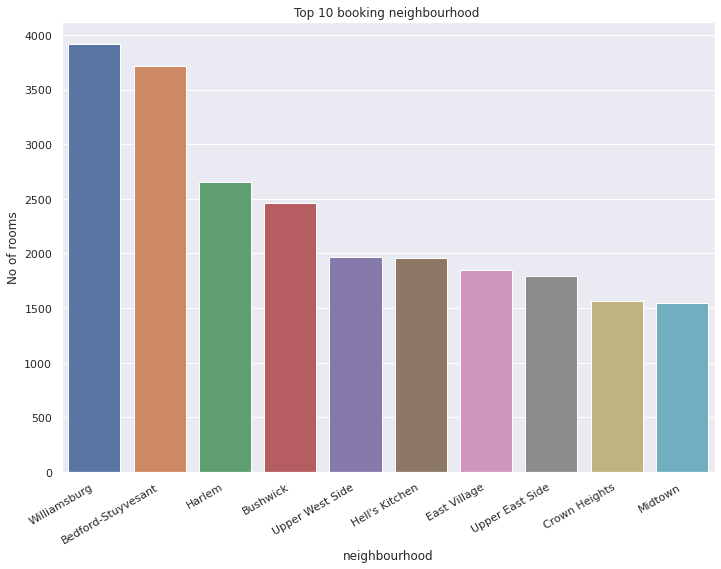

<Figure size 1152x1080 with 0 Axes>

In [245]:
sns.countplot( df.neighbourhood, order =df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 booking neighbourhood ') 
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of rooms')
plt.figure(figsize=(16,15)) 
plt.show()

In [246]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [247]:
# now we have to store similar neighbourhood in their respective neighbour group in different dataframes
brooklyn_group_df=df.loc[df['neighbourhood_group']== 'Brooklyn']
manhattan_group_df=df.loc[df['neighbourhood_group']== 'Manhattan']
Queens_group_df=df.loc[df['neighbourhood_group']== 'Queens']
Staten_Island_group_df=df.loc[df['neighbourhood_group']== 'Staten Island']
Bronx_group_df=df.loc[df['neighbourhood_group']== 'Bronx']

In [248]:
brooklyn_group_df=df.loc[df['neighbourhood_group']== 'Brooklyn']

In [249]:
brooklyn_group_df

id                                             name    host_id  \
0          2539               Clean & quiet apt home by the park       2787   
3          3831                  Cozy Entire Floor of Brownstone       4869   
6          5121                                  BlissArtsSpace!       7356   
12         5803   Lovely Room 1, Garden, Best Area, Legal rental       9744   
15         6848                 Only 2 stops to Manhattan studio      15991   
...         ...                                              ...        ...   
48882  36482231                        Bushwick _ Myrtle-Wyckoff   66058896   
48884  36482783      Brooklyn Oasis in the heart of Williamsburg  274307600   
48887  36483152  Garden Jewel Apartment in Williamsburg New York  208514239   
48890  36484665  Charming one bedroom - newly renovated rowhouse    8232441   
48891  36485057    Affordable room in Bushwick/East Williamsburg    6570630   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
6              Garon            Brooklyn  Bedford-Stuyvesant  40.68688   
12            Laurie            Brooklyn         South Slope  40.66829   
15     Allen & Irina            Brooklyn        Williamsburg  40.70837   
...              ...                 ...                 ...       ...   
48882          Luisa            Brooklyn            Bushwick  40.69652   
48884       Jonathan            Brooklyn        Williamsburg  40.71790   
48887          Melki            Brooklyn        Williamsburg  40.71232   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
3      -73.95976  Entire home/apt     89               1                270   
6      -73.95596     Private room     60              45                 49   
12     -73.98779     Private room     89               4                167   
15     -73.95352  Entire home/apt    140               2                148   
...          ...              ...    ...             ...                ...   
48882  -73.91079     Private room     40              20                  0   
48884  -73.96238     Private room    190               7                  0   
48887  -73.94220  Entire home/apt    170               1                  0   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
3      2019-07-05               4.64                               1   
6      2017-10-05               0.40                               1   
12     2019-06-24               1.34                               3   
15     2019-06-29               1.20                               1   
...           ...                ...                             ...   
48882         NaN                NaN                               1   
48884         NaN                NaN                               1   
48887         NaN                NaN                               3   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   

       availability_365  
0                   365  
3                   194  
6                     0  
12                  314  
15                   46  
...                 ...  
48882                31  
48884               341  
48887               365  
48890                 9  
48891                36  

[20104 rows x 16 columns]

In [250]:
brooklyn_group_df1 = brooklyn_group_df[["neighbourhood_group", "room_type","price"]]

In [251]:
brooklyn_group_df1

neighbourhood_group        room_type  price
0                Brooklyn     Private room    149
3                Brooklyn  Entire home/apt     89
6                Brooklyn     Private room     60
12               Brooklyn     Private room     89
15               Brooklyn  Entire home/apt    140
...                   ...              ...    ...
48882            Brooklyn     Private room     40
48884            Brooklyn     Private room    190
48887            Brooklyn  Entire home/apt    170
48890            Brooklyn     Private room     70
48891            Brooklyn     Private room     40

[20104 rows x 3 columns]

## hotel Price range in brooklyn

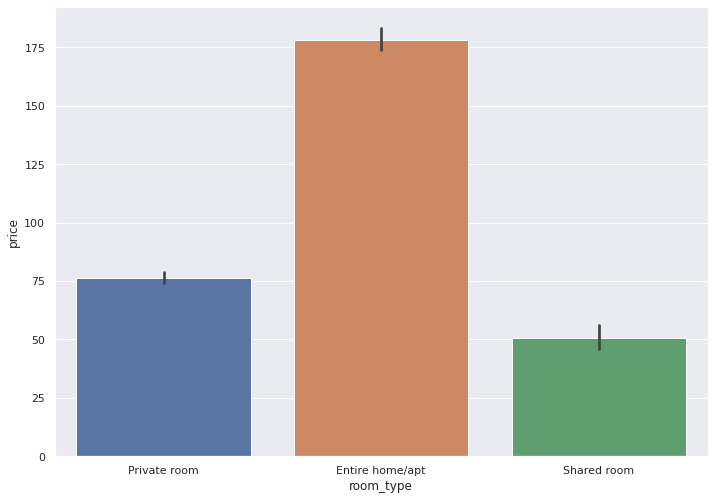

In [252]:
sns.barplot(x = 'room_type',
            y = 'price',
            data =brooklyn_group_df1)
plt.show()

## hotel Price range in manhattan

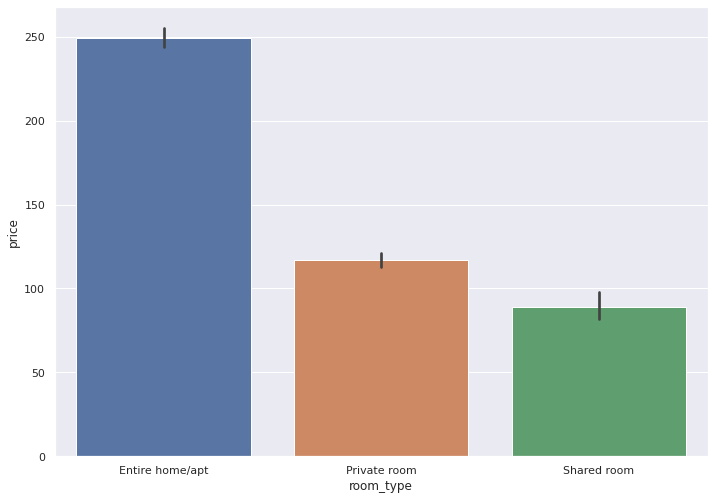

In [253]:
manhattan_group_df1 = manhattan_group_df[["neighbourhood_group", "room_type","price"]]
sns.barplot(x = 'room_type',
            y = 'price',
            data =manhattan_group_df1)
plt.show()

## hotel Price range in Queens

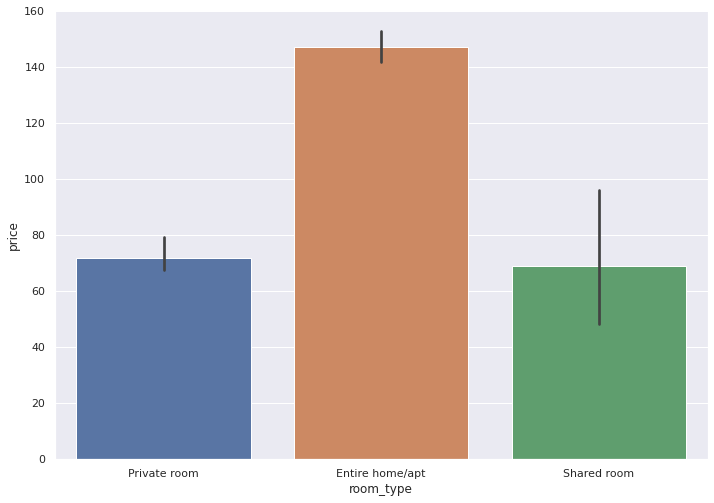

In [254]:
Queens_group_df1 = Queens_group_df[["neighbourhood_group", "room_type","price"]]
sns.barplot(x = 'room_type',
            y = 'price',
            data =Queens_group_df1)
plt.show()

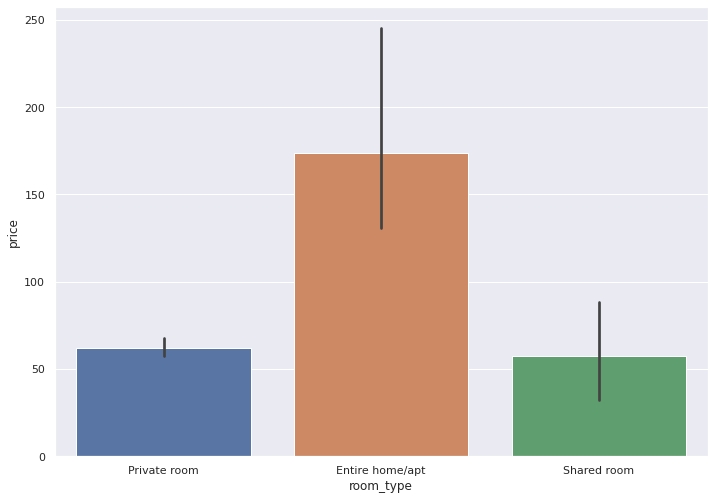

In [255]:
Staten_Island_group_df1= Staten_Island_group_df[["neighbourhood_group", "room_type","price"]]
sns.barplot(x = 'room_type',
            y = 'price',
            data =Staten_Island_group_df1)
plt.show()

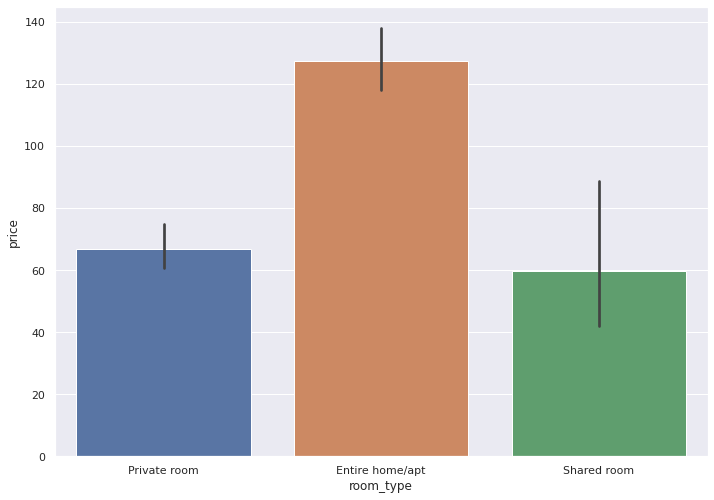

In [256]:
sns.barplot(x = 'room_type',
            y = 'price',
            data =Bronx_group_df)
plt.show()

Text(0.5, 0, 'Neighbourhood')

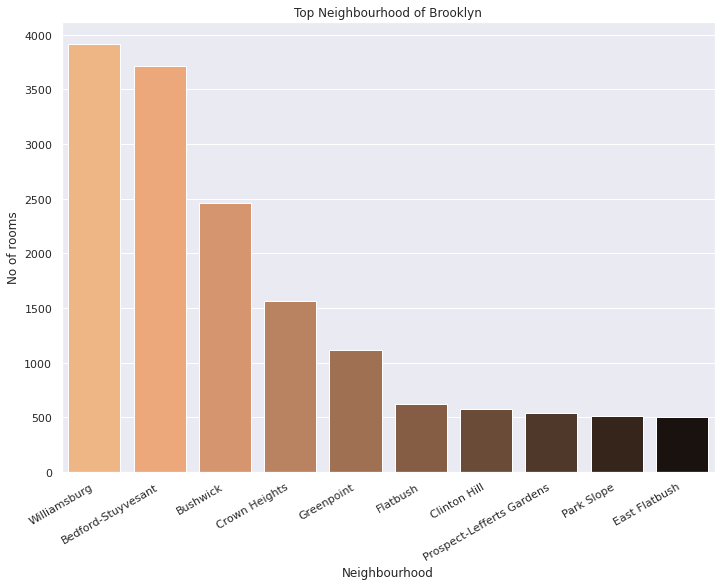

In [257]:
sns.countplot(x="neighbourhood", data=brooklyn_group_df, palette="copper_r",
              order=brooklyn_group_df.neighbourhood.value_counts().iloc[:10].index).set_title("Top Neighbourhood of Brooklyn")
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of rooms')
plt.xlabel('Neighbourhood')

Text(0.5, 0, 'Neighbourhood')

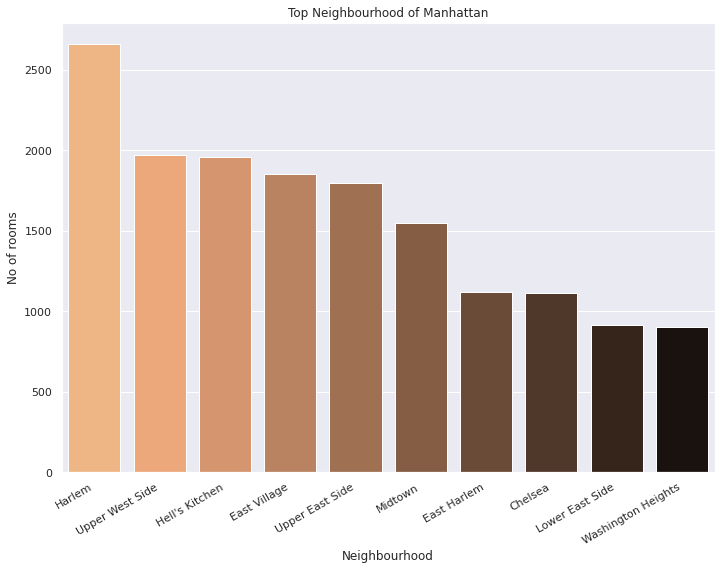

In [258]:
sns.countplot(x="neighbourhood", data=manhattan_group_df, palette="copper_r",
              order=manhattan_group_df.neighbourhood.value_counts().iloc[:10].index).set_title("Top Neighbourhood of Manhattan")
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of rooms')
plt.xlabel('Neighbourhood')

Text(0.5, 0, 'Neighbourhood')

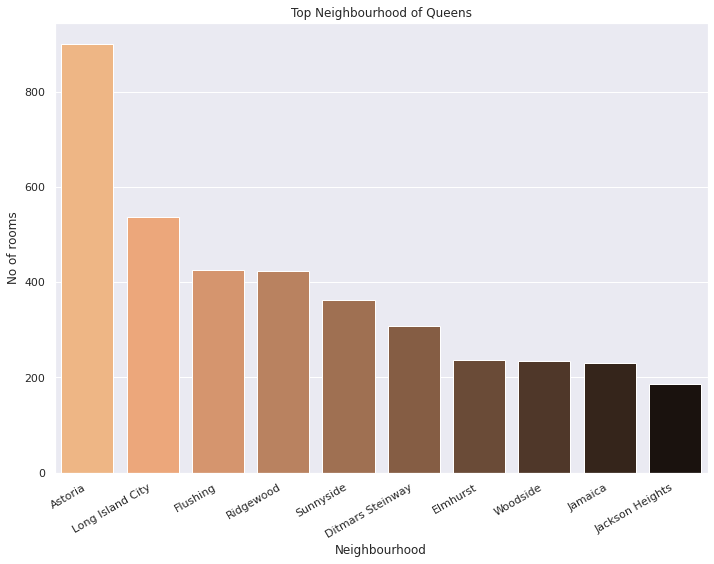

In [259]:
sns.countplot(x="neighbourhood", data=Queens_group_df, palette="copper_r",
              order=Queens_group_df.neighbourhood.value_counts().iloc[:10].index).set_title("Top Neighbourhood of Queens")
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of rooms')
plt.xlabel('Neighbourhood')

Text(0.5, 0, 'Neighbourhood')

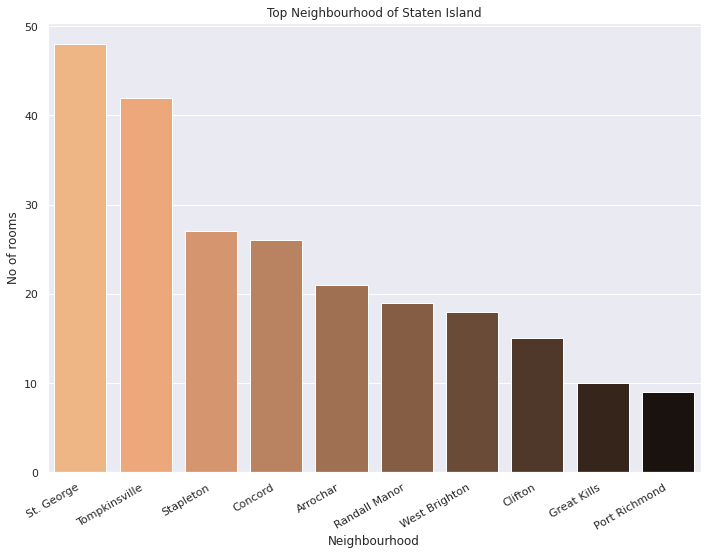

In [260]:
sns.countplot(x="neighbourhood", data=Staten_Island_group_df, palette="copper_r",
              order=Staten_Island_group_df.neighbourhood.value_counts().iloc[:10].index).set_title("Top Neighbourhood of Staten Island")
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of rooms')
plt.xlabel('Neighbourhood')

Text(0.5, 0, 'Neighbourhood')

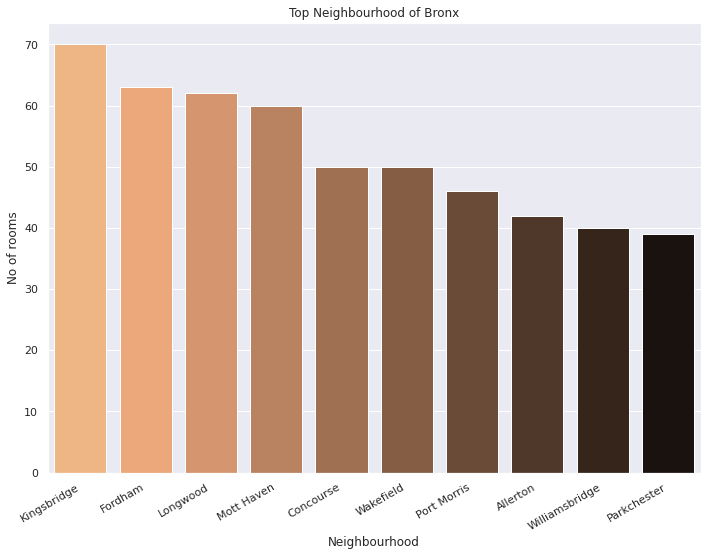

In [261]:
sns.countplot(x="neighbourhood", data=Bronx_group_df, palette="copper_r",
              order=Bronx_group_df.neighbourhood.value_counts().iloc[:10].index).set_title("Top Neighbourhood of Bronx")
plt.xticks(rotation=30,ha='right')
plt.ylabel('No of rooms')
plt.xlabel('Neighbourhood')

In [262]:
df.neighbourhood.value_counts().iloc[:10]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [263]:
df.neighbourhood.value_counts().iloc[:10].index

Index(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick',
       'Upper West Side', 'Hell's Kitchen', 'East Village', 'Upper East Side',
       'Crown Heights', 'Midtown'],
      dtype='object')

Text(0.5, 1.0, 'Top 10 Bronx neighbourhood value count')

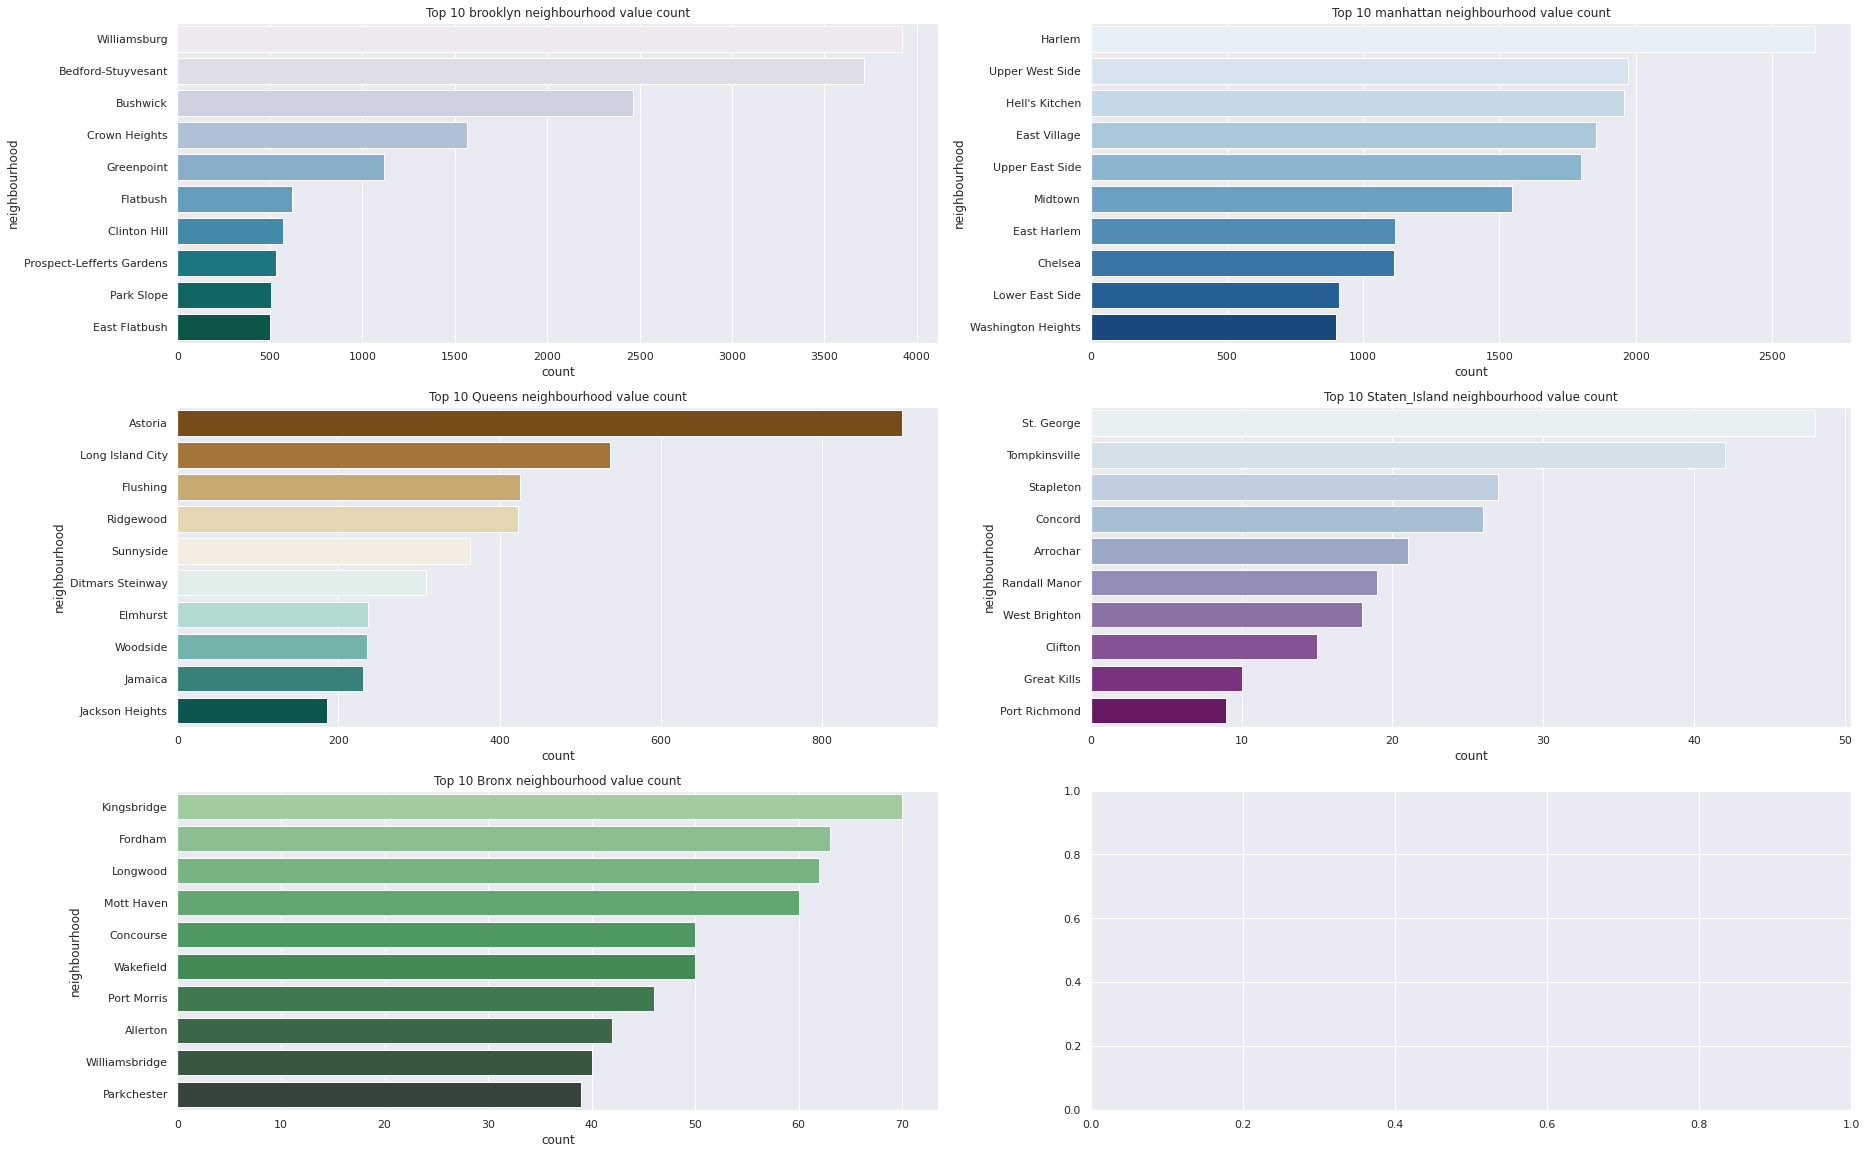

In [264]:
# creating subplots to plot all the graphs together 
fig, axes = plt.subplots(3,2, figsize=(30, 20))
sns.countplot(ax=axes[0,0],y="neighbourhood", data=brooklyn_group_df, palette="PuBuGn",
              order=brooklyn_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 brooklyn neighbourhood value count')
              
              
sns.countplot(ax=axes[0,1],y="neighbourhood", data=manhattan_group_df, palette="Blues",
              order=manhattan_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 manhattan neighbourhood value count')

sns.countplot(ax=axes[1,0],y="neighbourhood", data=Queens_group_df, palette="BrBG",
              order=Queens_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 Queens neighbourhood value count')

sns.countplot(ax=axes[1,1],y="neighbourhood", data=Staten_Island_group_df, palette="BuPu",
              order=Staten_Island_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 Staten_Island neighbourhood value count')

sns.countplot(ax=axes[2,0],y="neighbourhood", data=Bronx_group_df, palette="Greens_d",
              order=Bronx_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('Top 10 Bronx neighbourhood value count')

##Observations from the above graphs are as follow:
1. Willamsburg, Bedford and Bushwick have most no of bookings in brooklyn neighbourhood_group
2. Harlem, Upper West Side and Hell's Kitchen have most no of bookings in manhattan neighbourhood_group
3. Astoria, Flushing and Long island city  have most no of bookings in Queens neighbourhood_group
4. Tompkinsville, St.George, Cancaord have most no of bookings in Staten_Island neighbourhood_group
5. Kingsbridge,Fordham,Longwood have most no of bookings in Bronx Neighbour_group

## Column 6 and 7 : Latitude and longitude

In [265]:
df.latitude.describe()

count    48895.000000
mean        40.728949
std          0.054530
min         40.499790
25%         40.690100
50%         40.723070
75%         40.763115
max         40.913060
Name: latitude, dtype: float64

In [266]:
df.longitude.describe()

count    48895.000000
mean       -73.952170
std          0.046157
min        -74.244420
25%        -73.983070
50%        -73.955680
75%        -73.936275
max        -73.712990
Name: longitude, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


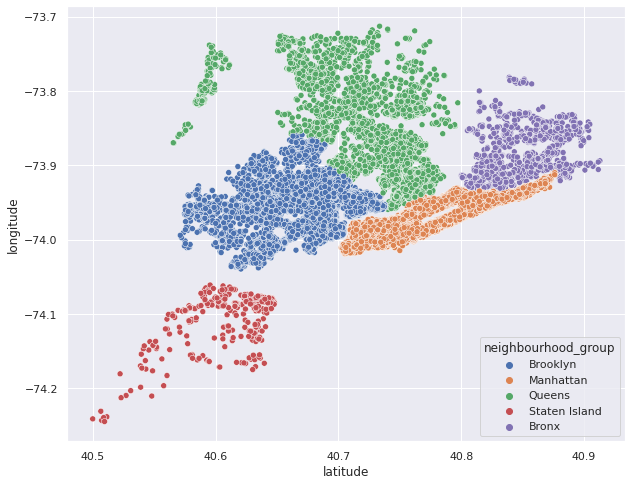

In [267]:
# Pointing the plot on graph through scattering plot
plt.figure(figsize=(10,8))
sns.scatterplot(df.latitude,df.longitude, hue='neighbourhood_group', data=df)


Text(0.5, 1.0, 'Density of rooms')

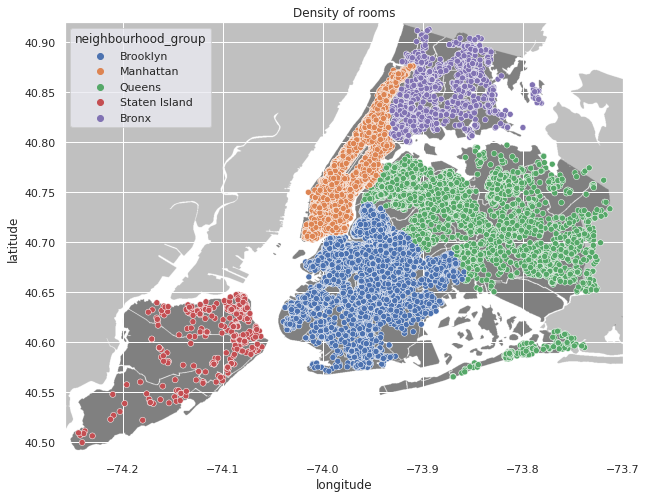

In [268]:
# Importing image 
import urllib
# setting  figure size
plt.figure(figsize=(10,8))
# setting  background map image in graph
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
image=plt.imread(img)
plt.imshow(image,zorder=0,extent=[-74.258, -73.7, 40.488, 40.92])
sns.scatterplot(data = df,x='longitude',y='latitude',hue='neighbourhood_group').set_title('Density of rooms')

### Column no. 8: Room type

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


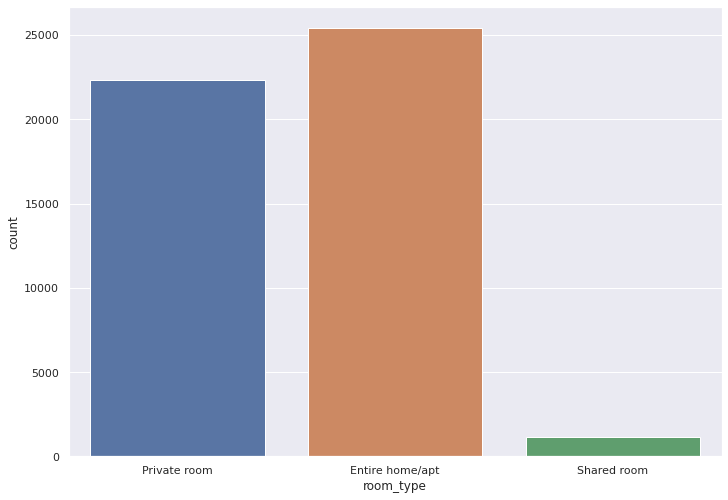

In [269]:
#number of rooms_type provided by the hosts
print(df.room_type.value_counts())
sns.countplot(df.room_type)

##Observation :
##There are 3 room type provided by the host. Most of the rooms provided are private rooms and Entire home or apartments type.

##Share rooms are very few, therefore we observe that people who aRE travelling will prefer the top 2 room types rather than sharing.

### column 9 : price of room

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


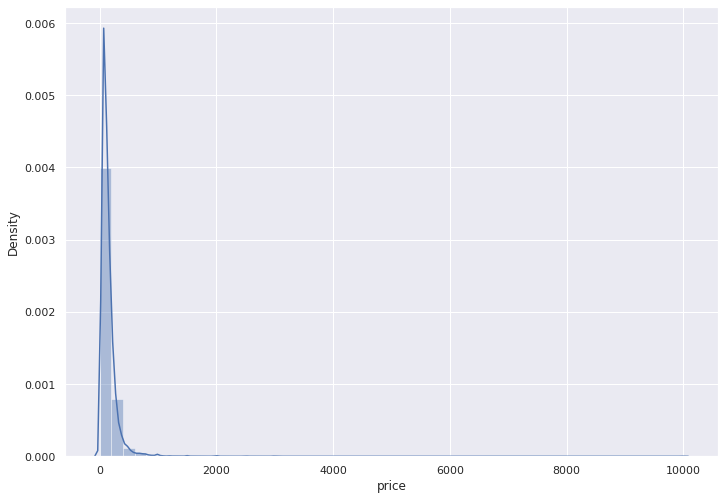

In [270]:
sns.distplot(df.price)

### Observation :
1. Maximun price of property are range between 0 to 1000.
2. There is Property which has price zero it is impossible.

In [271]:
# lets see how many property have price zero
zero_price_property = df.loc[df.price == 0 ]
zero_price_property

id                                               name    host_id  \
23161  18750597  Huge Brooklyn Brownstone Living, Close to it all.    8993084   
25433  20333471      ★Hostel Style Room | Ideal Traveling Buddies★  131697576   
25634  20523843    MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)   15787004   
25753  20608117                    Sunny, Quiet Room in Greenpoint    1641537   
25778  20624541      Modern apartment in the heart of Williamsburg   10132166   
25794  20639628  Spacious comfortable master bedroom with nice ...   86327101   
25795  20639792  Contemporary bedroom in brownstone with nice view   86327101   
25796  20639914       Cozy yet spacious private brownstone bedroom   86327101   
26259  20933849                              the best you can find   13709292   
26841  21291569  Coliving in Brooklyn! Modern design / Shared room  101970559   
26866  21304320             Best Coliving space ever! Shared room.  101970559   

          host_name neighbourhood_group       neighbourhood  latitude  \
23161      Kimberly            Brooklyn  Bedford-Stuyvesant  40.69023   
25433        Anisha               Bronx     East Morrisania  40.83296   
25634  Martial Loft            Brooklyn            Bushwick  40.69467   
25753        Lauren            Brooklyn          Greenpoint  40.72462   
25778       Aymeric            Brooklyn        Williamsburg  40.70838   
25794       Adeyemi            Brooklyn  Bedford-Stuyvesant  40.68173   
25795       Adeyemi            Brooklyn  Bedford-Stuyvesant  40.68279   
25796       Adeyemi            Brooklyn  Bedford-Stuyvesant  40.68258   
26259        Qiuchi           Manhattan         Murray Hill  40.75091   
26841        Sergii            Brooklyn            Bushwick  40.69211   
26866        Sergii            Brooklyn            Bushwick  40.69166   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
23161  -73.95428     Private room      0               4                  1   
25433  -73.88668     Private room      0               2                 55   
25634  -73.92433     Private room      0               2                 16   
25753  -73.94072     Private room      0               2                 12   
25778  -73.94645  Entire home/apt      0               5                  3   
25794  -73.91342     Private room      0               1                 93   
25795  -73.91170     Private room      0               1                 95   
25796  -73.91284     Private room      0               1                 95   
26259  -73.97597  Entire home/apt      0               3                  0   
26841  -73.90670      Shared room      0              30                  2   
26866  -73.90928      Shared room      0              30                  5   

      last_review  reviews_per_month  calculated_host_listings_count  \
23161  2018-01-06               0.05                               4   
25433  2019-06-24               2.56                               4   
25634  2019-05-18               0.71                               5   
25753  2017-10-27               0.53                               2   
25778  2018-01-02               0.15                               1   
25794  2019-06-15               4.28                               6   
25795  2019-06-21               4.37                               6   
25796  2019-06-23               4.35                               6   
26259         NaN                NaN                               1   
26841  2019-06-22               0.11                               6   
26866  2019-05-24               0.26                               6   

       availability_365  
23161                28  
25433               127  
25634                 0  
25753                 0  
25778                73  
25794               176  
25795               232  
25796               222  
26259                 0  
26841               333  
26866               139

In [272]:
zero_price_property.shape

(11, 16)

### we can see that there are 11 property which has zero price. This is unusual.

## Column no. 10 : Minimum Nights

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'No of rooms')

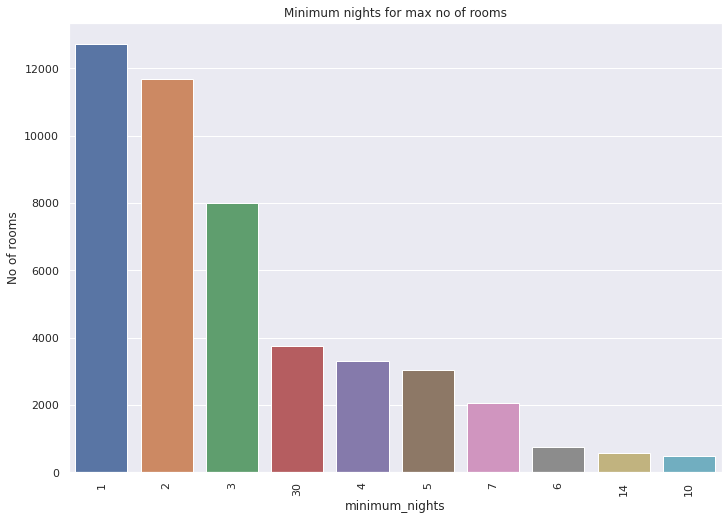

In [273]:
#creating a count plot 
sns.countplot(df.minimum_nights,order=df.minimum_nights.value_counts().iloc[:10].index).set_title('Minimum nights for max no of rooms')
#rotating x lables 
plt.xticks(rotation=90)
#adding x and y labels to the plot
plt.ylabel('No of rooms')

In [274]:
#properties recieving highest reviews.
highest_reviews = df.sort_values(by='number_of_reviews', ascending=False)
highest_reviews.head()

id                            name   host_id host_name  \
11759   9145202         Room near JFK Queen Bed  47621202      Dona   
2031     903972      Great Bedroom in Manhattan   4734398        Jj   
2030     903947  Beautiful Bedroom in Manhattan   4734398        Jj   
2015     891117    Private Bedroom in Manhattan   4734398        Jj   
13495  10101135         Room Near JFK Twin Beds  47621202      Dona   

      neighbourhood_group neighbourhood  latitude  longitude     room_type  \
11759              Queens       Jamaica  40.66730  -73.76831  Private room   
2031            Manhattan        Harlem  40.82085  -73.94025  Private room   
2030            Manhattan        Harlem  40.82124  -73.93838  Private room   
2015            Manhattan        Harlem  40.82264  -73.94041  Private room   
13495              Queens       Jamaica  40.66939  -73.76975  Private room   

       price  minimum_nights  number_of_reviews last_review  \
11759     47               1                629  2019-07-05   
2031      49               1                607  2019-06-21   
2030      49               1                597  2019-06-23   
2015      49               1                594  2019-06-15   
13495     47               1                576  2019-06-27   

       reviews_per_month  calculated_host_listings_count  availability_365  
11759              14.58                               2               333  
2031                7.75                               3               293  
2030                7.72                               3               342  
2015                7.57                               3               339  
13495              13.40                               2               173

## Observation:
above dataframe shows to 10 review

In [275]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

# Column number 11: Number of review

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


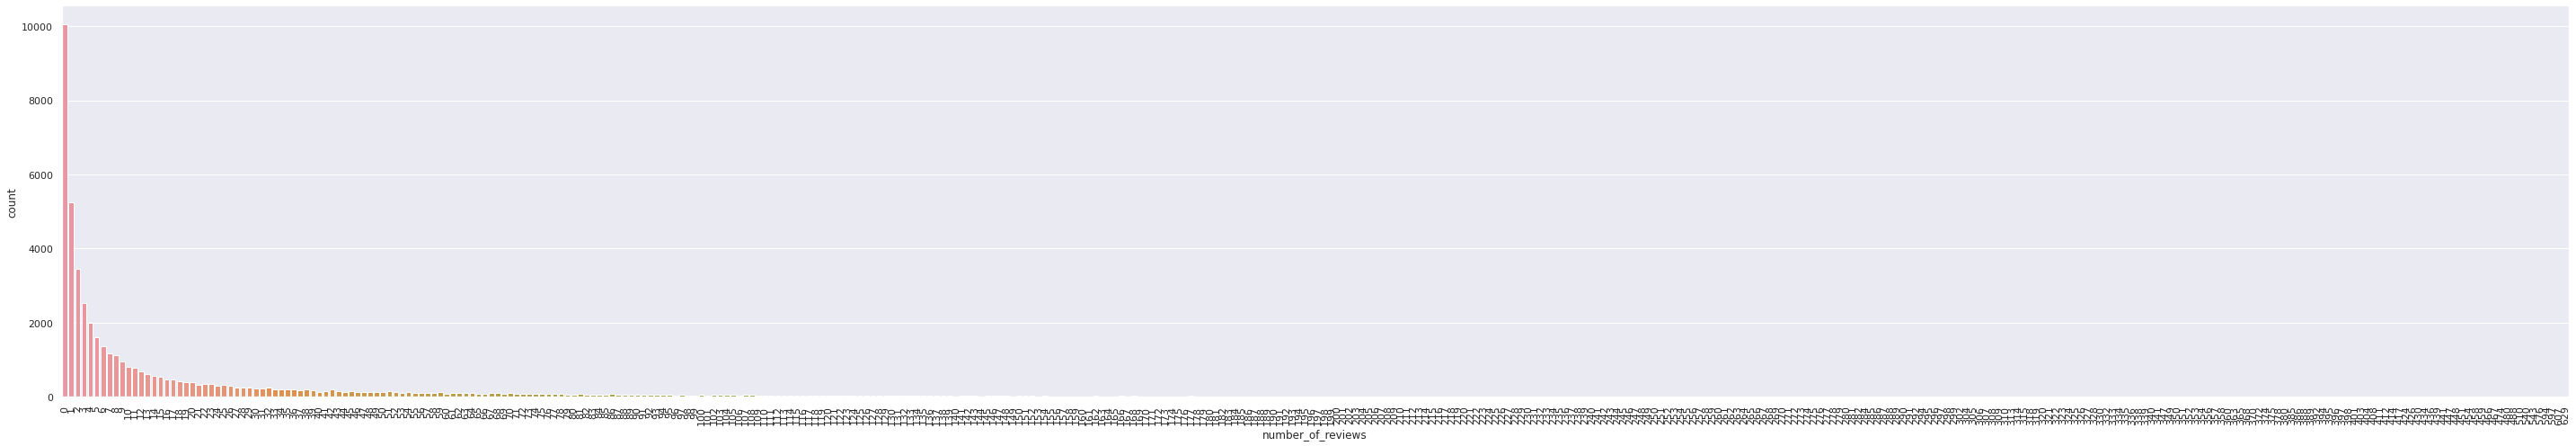

In [276]:
#settingt he size of the figure 
plt.figure(figsize=(50,8))
#creating a caunt plot
sns.countplot(df.number_of_reviews)
#rotating the x lables
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


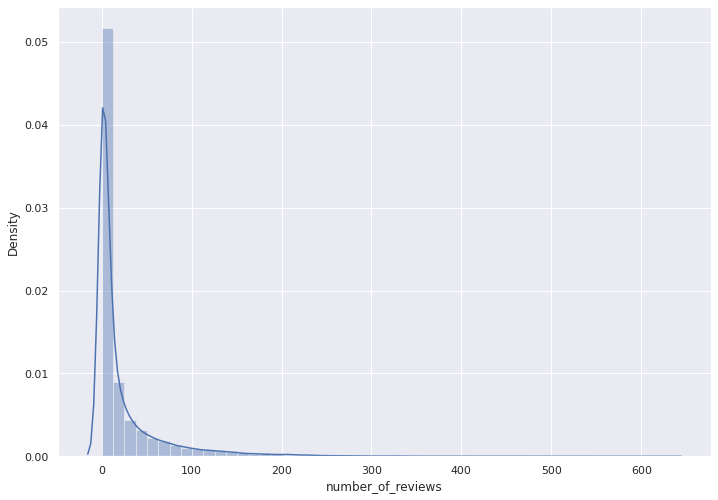

In [277]:
#creating a dist plot
sns.distplot(df.number_of_reviews)

# Column number 12 : Last Review

In [278]:
df['last_review']=pd.to_datetime(df['last_review'])
df.last_review

0       2018-10-19
1       2019-05-21
2              NaT
3       2019-07-05
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 48895, dtype: datetime64[ns]

In [279]:
#printing the least and most recent review date
least_recent_date = df['last_review'].min()
most_recent_date = df['last_review'].max()
print(f'the least recent date is {least_recent_date.date()} and the most recent date is {most_recent_date.date()} in last review')

the least recent date is 2011-03-28 and the most recent date is 2019-07-08 in last review


# Colunm number 13:  reviews per month

In [280]:
df.reviews_per_month.describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

Text(0, 0.5, 'No of rooms')

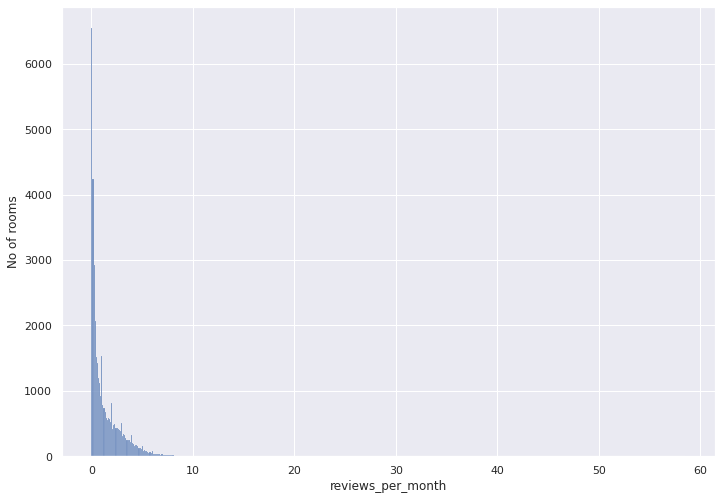

In [281]:
#creating histplot and adding lablesto y axis
sns.histplot(df[df['reviews_per_month']>0].reviews_per_month)
plt.ylabel('No of rooms')

# Data cleaning and wrangling

In [282]:
# calling features
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [283]:
df.info

<bound method DataFrame.info of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

       

In [284]:
print(df.isnull().any())

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool


In [285]:
# We have 4 columns contain a missing value. Now, we drop unnecessary columns such as id, name, host_name, last_review.

In [286]:
# Replacing all NaN values in “review_per_month_ with 0
df.reviews_per_month.fillna(0, inplace=True)
print(df.isnull().any())

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool


we haven't have any missing value

##Data visulaization

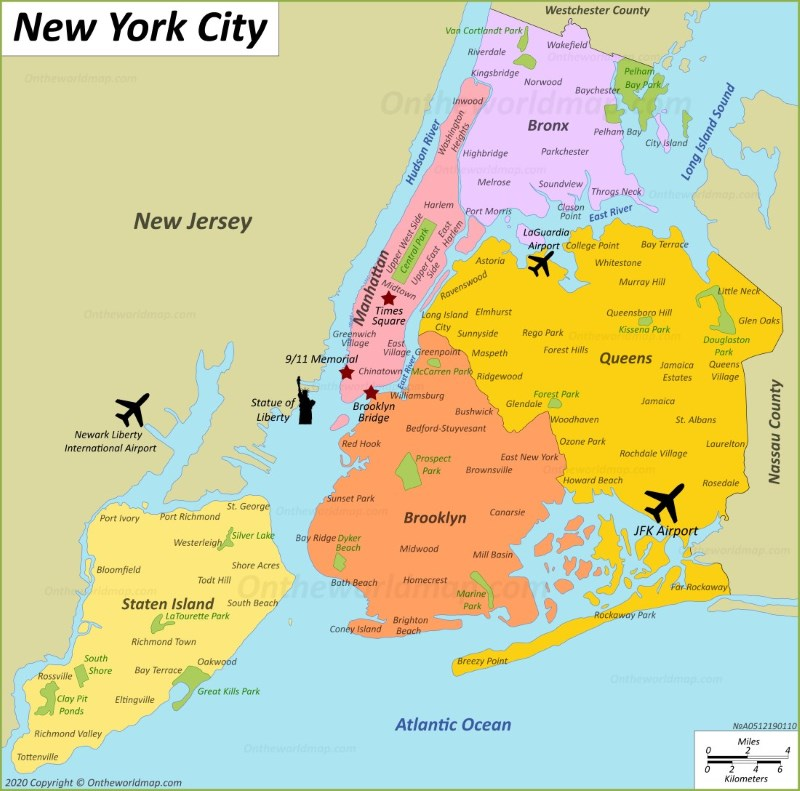

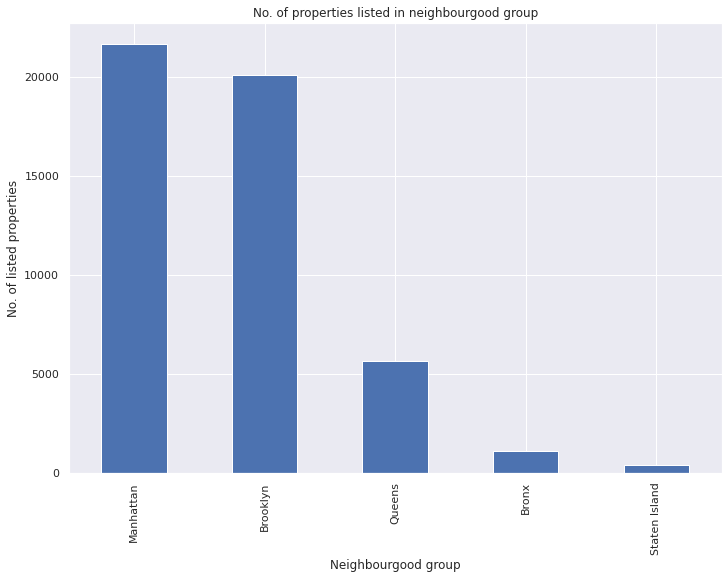

In [287]:
#number of listing at neughbourhood group
df['neighbourhood_group'].value_counts().plot(kind='bar')
plt.title('No. of properties listed in neighbourgood group')
plt.xlabel('Neighbourgood group')
plt.ylabel('No. of listed properties')
plt.show()

In [288]:
df.groupby('neighbourhood_group')['price'].max().reset_index()

neighbourhood_group  price
0               Bronx   2500
1            Brooklyn  10000
2           Manhattan  10000
3              Queens  10000
4       Staten Island   5000

###Top planning area

Text(0.5, 1.0, 'Top 15 areas that have highest number of listing')

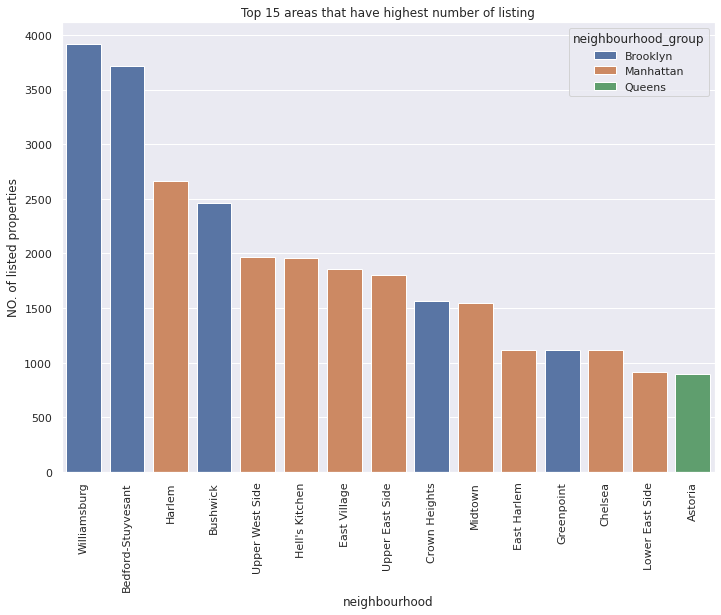

In [289]:
#top planning areas
top_planing_area=df.groupby(['neighbourhood_group']).neighbourhood.value_counts(ascending=True).sort_values(ascending=False).head(15).to_frame('NO. of listed properties').reset_index()
a=sns.barplot(x='neighbourhood',y='NO. of listed properties',hue='neighbourhood_group',data=top_planing_area,dodge = False)
plt.xticks(rotation=90)
a.set_title('Top 15 areas that have highest number of listing')

#1. if we have higher min nights does that mean price per night will be less	 ( need more analysis) and is there any relation between any columns <br>

Minimum night and price per night is not corealted.

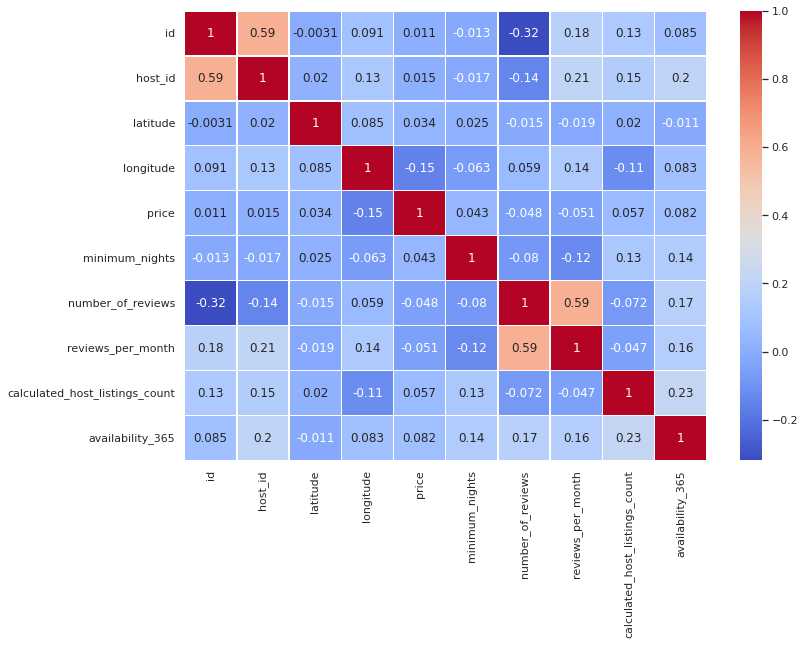

In [290]:
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm',linewidths=.5)

In [291]:
# if we have higher min nights does that mean price per night will be less     
df.groupby(['room_type','minimum_nights'])

In [292]:
minimum_night_price = df.groupby(['room_type','minimum_nights'],
                                 as_index=False)['price'].median()
minimum_night_price.loc[~(minimum_night_price['minimum_nights'] == 999)] 
minimum_night_price.loc[~((minimum_night_price['price'] >= 500) )] 

room_type  minimum_nights  price
0    Entire home/apt               1  158.0
1    Entire home/apt               2  165.0
2    Entire home/apt               3  168.0
3    Entire home/apt               4  165.0
4    Entire home/apt               5  155.0
..               ...             ...    ...
187      Shared room              62   35.0
188      Shared room              90   25.0
189      Shared room             100   33.0
190      Shared room             120   35.0
191      Shared room             999  110.0

[190 rows x 3 columns]

##does no of review affect the price ?

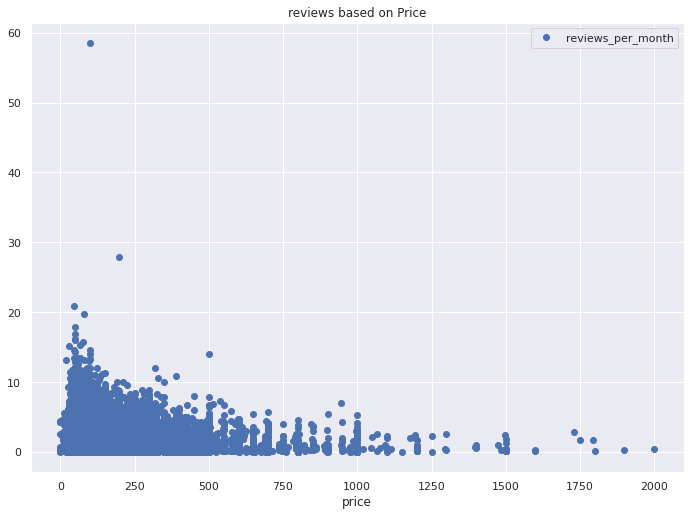

In [293]:
price_review = df[['reviews_per_month', 'price']].sort_values(by = 'price')
price_review=price_review.loc[price_review['reviews_per_month']>0]
price_review=price_review.loc[price_review['price']<2000]
price_review.plot(x = 'price', y = 'reviews_per_month', 
                  style = 'o',
                  title = 'reviews based on Price')

<bound method Artist.set of <matplotlib.axes._subplots.AxesSubplot object at 0x7f68d522cc50>>

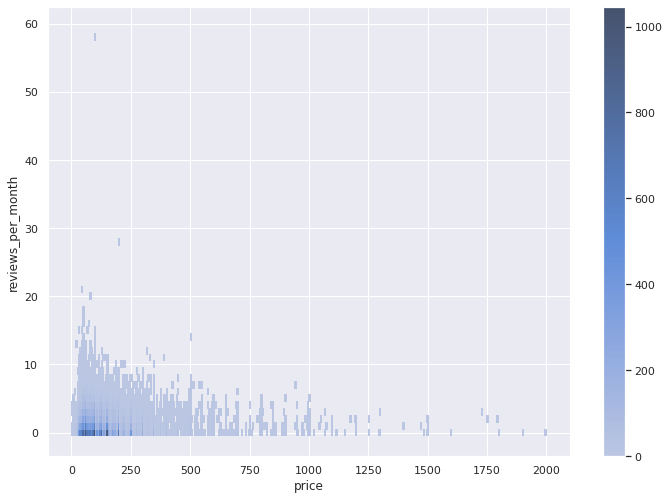

In [294]:
sns.histplot(data = price_review, x = 'price', y = 'reviews_per_month',discrete=(False,True),cbar=True).set

Observations

1) review per month of price range between 0 & 250 is more by which we can conclude that most people prefer renting rooms which have a price below 250 

2) reviews per month decrease as you increase the price

Which neighbourhood is most expensive in NewYork City? (at each neighbourhood-group)
1. At manhattan, Tribecca and flatiron district.
2. At brooklyn, Dumbo
3. At Bronx, Riverdale
4. At queens, ponsit
5. At Staten Island, Fort wastword

# 2. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

Text(0.5, 1.0, 'Density of rooms')

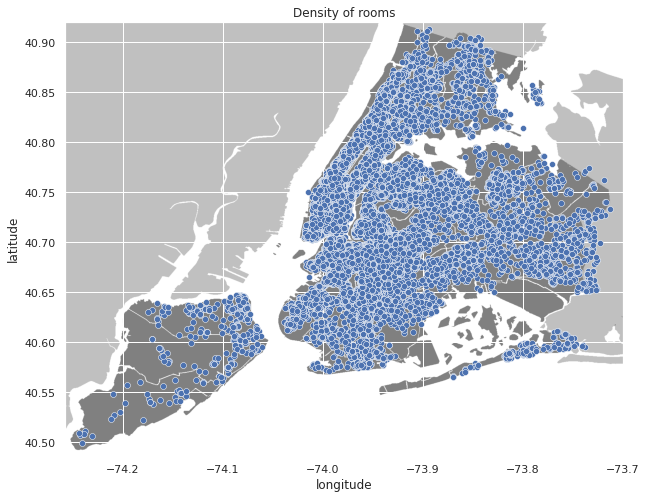

In [295]:
# Importing image 
import urllib
# setting  figure size
plt.figure(figsize=(10,8))
# setting  background map image in graph
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
image=plt.imread(img)
plt.imshow(image,zorder=0,extent=[-74.258, -73.7, 40.488, 40.92])
sns.scatterplot(data = df,x='longitude',y='latitude').set_title('Density of rooms')

In [296]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from scipy.stats import pearsonr


In [297]:
Long=-73.80
Lat=40.80
locations = list(zip(df.latitude, df.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1

# 4) does no of review affect the price

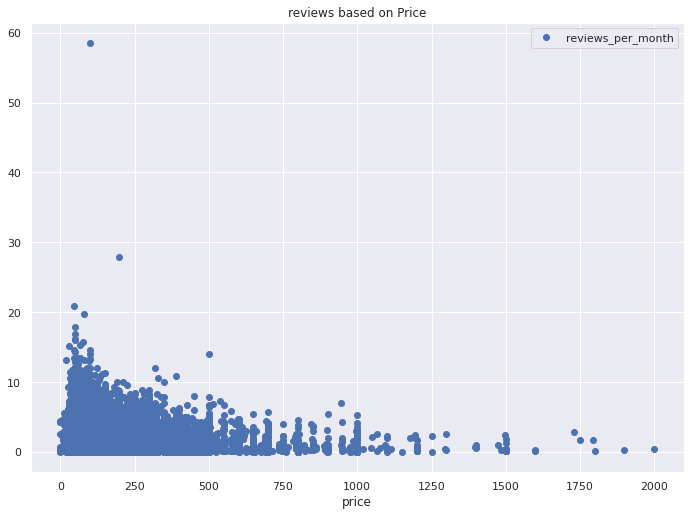

In [298]:
price_review = df[['reviews_per_month', 'price']].sort_values(by = 'price')
price_review=price_review.loc[price_review['reviews_per_month']>0]
price_review=price_review.loc[price_review['price']<2000]
price_review.plot(x = 'price', y = 'reviews_per_month', 
                  style = 'o',
                  title = 'reviews based on Price')

<bound method Artist.set of <matplotlib.axes._subplots.AxesSubplot object at 0x7f68d0cb7310>>

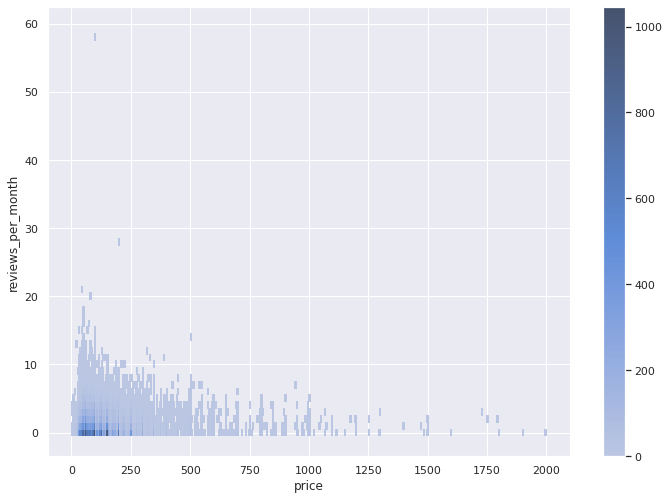

In [299]:
sns.histplot(data = price_review, x = 'price', y = 'reviews_per_month',discrete=(False,True),cbar=True).set

##Observations

1) review per month of price range between 0 & 250 is more by which we can conclude that most people prefer renting rooms which have a price below 250 

2) reviews per month decrease as you increase the price

#5) Which neighbourhood is most expensive in NewYork City? (at each neighbourhood-group)
1. At manhattan, Tribecca and flatiron district.
2. At brooklyn, Dumbo
3. At Bronx, Riverdale
4. At queens, ponsit
5. At Staten Island, Fort wastword

##minimum and maximum price neighbourhood wise

In [300]:
nei_max = df.groupby(['neighbourhood_group','neighbourhood'])['price'].max().reset_index()
nei_min =df.groupby(['neighbourhood_group','neighbourhood'])['price'].min().reset_index()
nei_avg =df.groupby(['neighbourhood_group','neighbourhood'])['price'].median().reset_index()

###find out number of airbnb acomodation facility at neighboorhood of **manhattan** 

In [301]:
###find out number of airbnb acomodation facility at neighboorhood of **manhattan** 

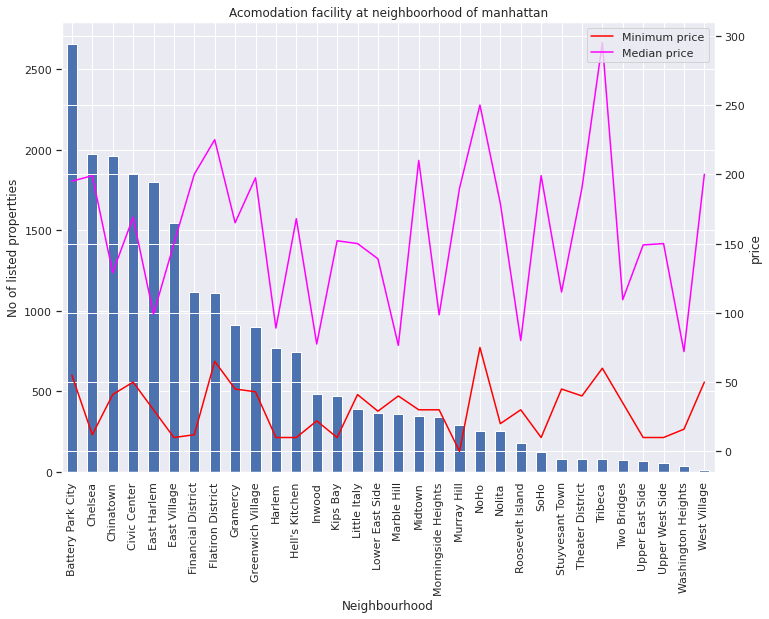

Number of neighborhoods in Manhattan where rental housing is listed: 32


In [302]:
man_data = df[df['neighbourhood_group'] == 'Manhattan']
man_ax1 = man_data['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation facility at neighboorhood of manhattan')
ax2 = man_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Manhattan'])'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Manhattan'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Manhattan'])
plt.legend(loc='upper right') #set legend position
plt.title('')
plt.show()
print(f'Number of neighborhoods in Manhattan where rental housing is listed: {man_data["neighbourhood"].nunique()}')



###find out number of airbnb acomodation facility at neighboorhood of **manhattan** depend on room  type **private room**

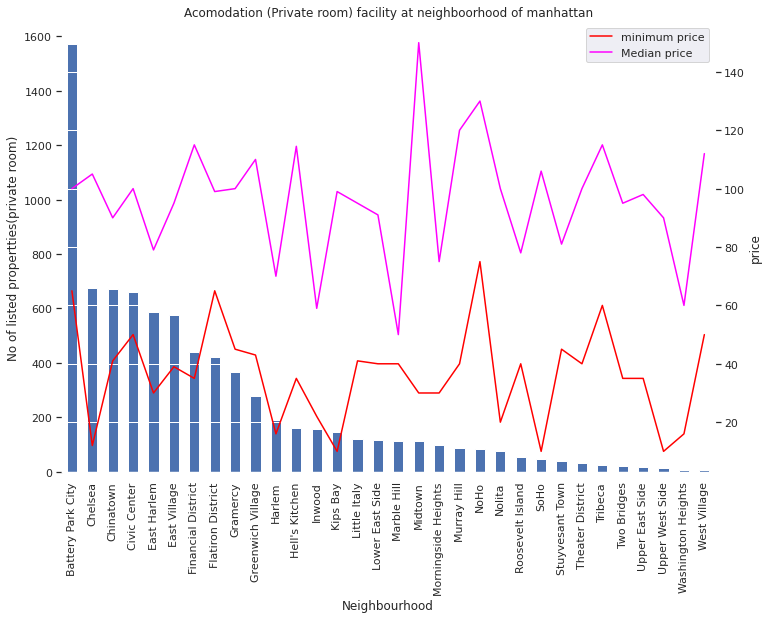

Number of neighborhoods in Manhattan where rental housing (private room) is listed: 32


In [303]:
#plt.rcParams['axes.facecolor'] = 'skyblue'
pri_room = man_data[man_data['room_type']=='Private room']
man_ax1 = pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Private room) facility at neighboorhood of manhattan')

ax2 = man_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=pri_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=pri_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
man_ax1.set_facecolor('xkcd:white')
plt.show()
print(f'Number of neighborhoods in Manhattan where rental housing (private room) is listed: {pri_room["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **manhattan** depend on room  type **Entire home/apt**

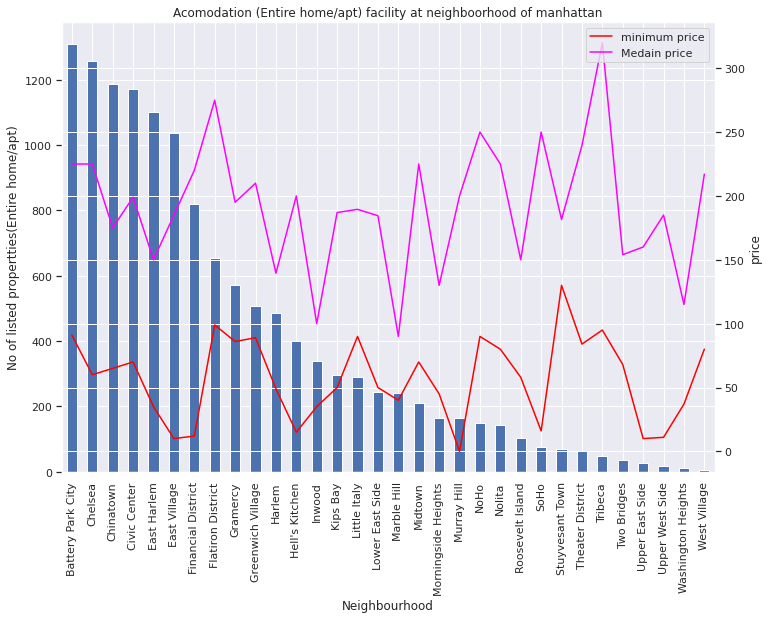

Number of neighborhoods in Manhattan where rental housing (Entire home/apt) is listed: 32


In [304]:
apt_room = man_data[man_data['room_type']=='Entire home/apt']
man_ax1 = apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Entire home/apt)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Entire home/apt) facility at neighboorhood of manhattan')
                                                     
ax2 = man_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=apt_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Medain price',
             data=apt_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Manhattan where rental housing (Entire home/apt) is listed: {apt_room["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **manhattan** depend on room  type **Shared room**

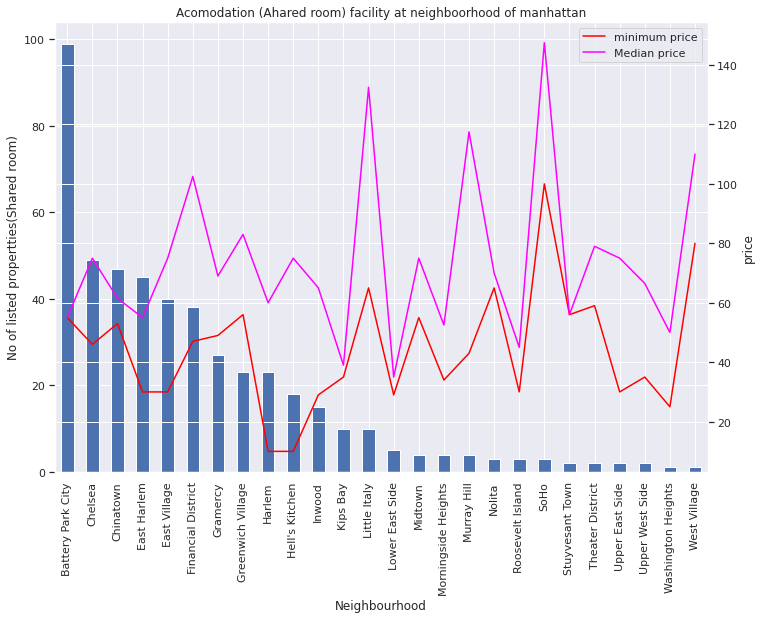

Number of neighborhoods in Manhattan where rental housing (shared room) is listed: 26


In [305]:
shr_room = man_data[man_data['room_type']=='Shared room']
man_ax1 = shr_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Shared room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Ahared room) facility at neighboorhood of manhattan')

ax2 = man_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=shr_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=shr_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=shr_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Manhattan where rental housing (shared room) is listed: {shr_room["neighbourhood"].nunique()}')

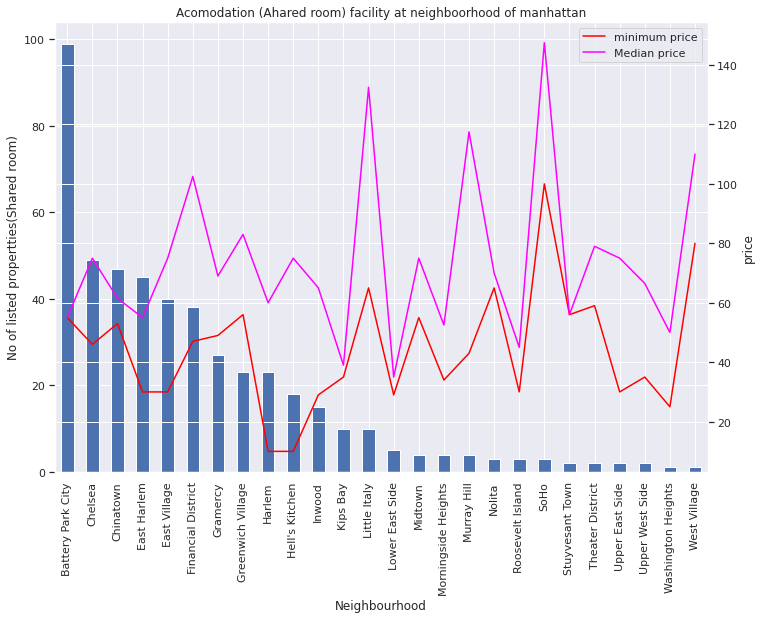

Number of neighborhoods in Manhattan where rental housing (shared room) is listed: 26


In [306]:
shr_room = man_data[man_data['room_type']=='Shared room']
man_ax1 = shr_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Shared room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Ahared room) facility at neighboorhood of manhattan')

ax2 = man_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=shr_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=shr_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=shr_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Manhattan where rental housing (shared room) is listed: {shr_room["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **Brooklyn** depend on room  type **private room**

##find out number of airbnb acomodation facility at neighboorhood of **Queens** 

###find out number of airbnb acomodation facility at neighboorhood of Queens

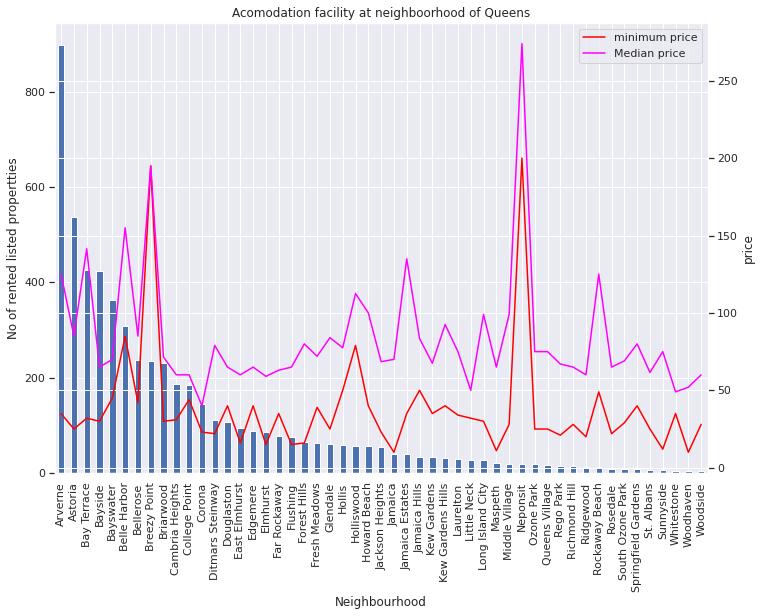

Number of neighborhoods in Queens where rental housing is listed: 51


In [307]:
Queens_data = df[df['neighbourhood_group'] == 'Queens']
sns.set(rc={'figure.figsize':(11.7,8.27)})
que_ax1 = Queens_data['neighbourhood'].value_counts().plot(kind="bar",
                                              ylabel='No of rented listed propertties',
                                              xlabel='Neighbourhood',
                                              title='Acomodation facility at neighboorhood of Queens')

ax2 = que_ax1.twinx() # create axis 2 for prrice listing
"""sns.lineplot(x='neighbourhood', 
             y='price',
             color='purple',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Queens'])"""
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Queens'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Queens'])
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Queens where rental housing is listed: {Queens_data["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **Queens** depend on room type **private room**

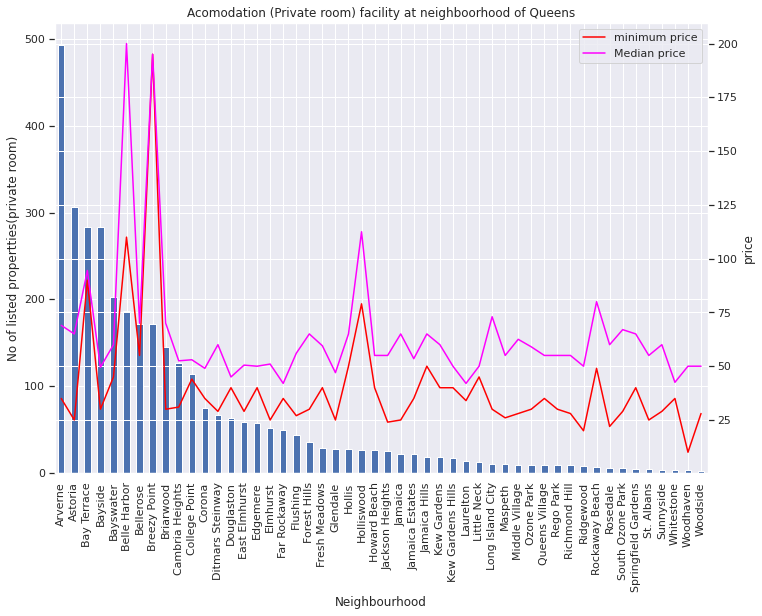

Number of neighborhoods in Queens where rental housing (private room) is listed: 50


In [308]:
queens_pri_room = Queens_data[Queens_data['room_type']=='Private room']
que_ax1 = queens_pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Private room) facility at neighboorhood of Queens')

ax2 = que_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=queens_pri_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=queens_pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=queens_pri_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Queens where rental housing (private room) is listed: {queens_pri_room["neighbourhood"].nunique()}')

In [309]:
###find out number of airbnb acomodation facility at neighboorhood of **Queens** depend on room type **Entire home/apt**

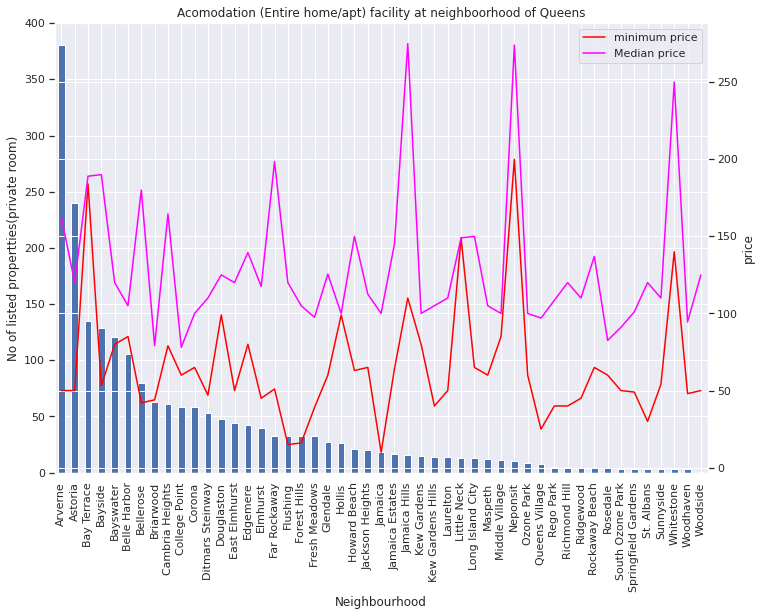

Number of neighborhoods in Queens where rental housing (entire home/apt) is listed: 49


In [310]:
queens_ent_room = Queens_data[Queens_data['room_type']=='Entire home/apt']
que_ax1 = queens_ent_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Entire home/apt) facility at neighboorhood of Queens')

ax2 = que_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=queens_pri_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=queens_ent_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=queens_ent_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Queens where rental housing (entire home/apt) is listed: {queens_ent_room["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **Queens** depend on room type **Shared room**

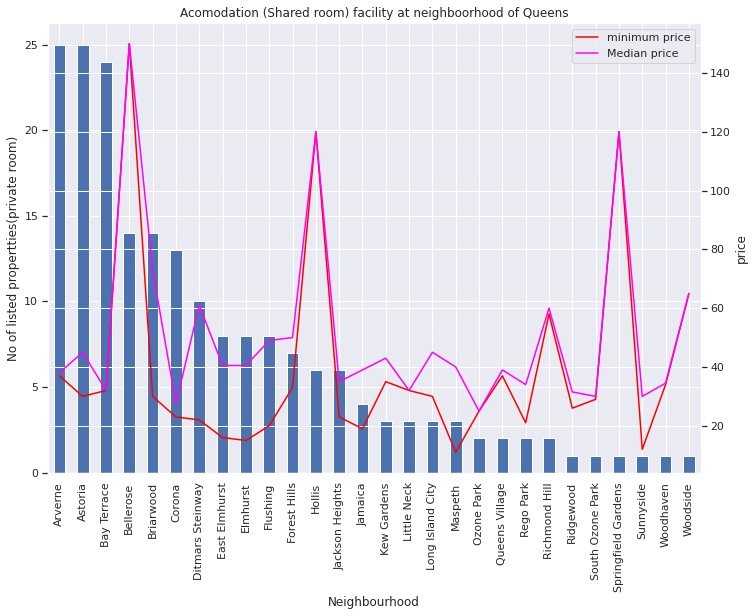

Number of neighborhoods in Queens where rental housing (shared room) is listed: 28


In [311]:
queens_shr_room = Queens_data[Queens_data['room_type']== 'Shared room']
que_ax1 = queens_shr_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Shared room) facility at neighboorhood of Queens')

ax2 = que_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=queens_shr_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=queens_shr_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=queens_shr_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Queens where rental housing (shared room) is listed: {queens_shr_room["neighbourhood"].nunique()}')

##find out number of airbnb acomodation facility at neighboorhood of **Bronx** 

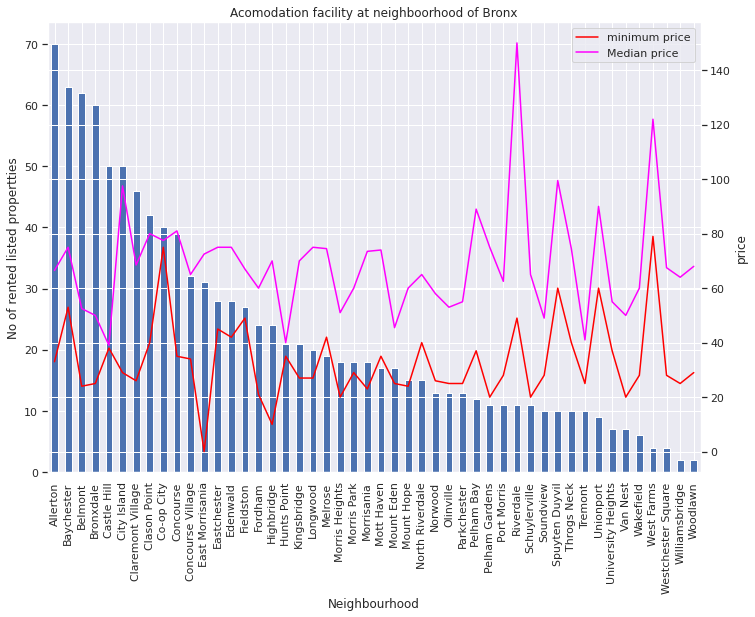

Number of neighborhoods in Bronx where rental housing is listed: 48


In [312]:
bronx_data = df[df['neighbourhood_group'] == 'Bronx']
bro_ax1 = bronx_data['neighbourhood'].value_counts().plot(kind="bar",
                                                          ylabel='No of rented listed propertties',
                                                          xlabel='Neighbourhood',
                                                          title='Acomodation facility at neighboorhood of Bronx')
ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='purple',
             label='maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Bronx'])'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Bronx'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Bronx'])
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Bronx where rental housing is listed: {bronx_data["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **Bronx** depend on room type **private room**

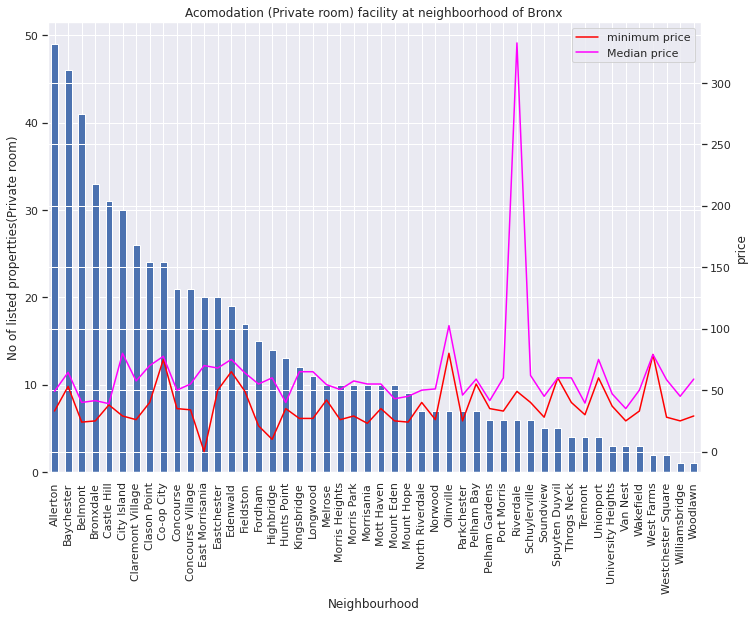

Number of neighborhoods in Bronx where rental housing (private room) is listed: 48


In [313]:
bronx_pri_room = bronx_data[bronx_data['room_type']=='Private room']
bronx_ax1 =bronx_pri_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Private room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Private room) facility at neighboorhood of Bronx')

ax2 = bronx_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=bronx_pri_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=bronx_pri_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=bronx_pri_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Bronx where rental housing (private room) is listed: {bronx_pri_room["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **Bronx** depend on room type **Entire apt**

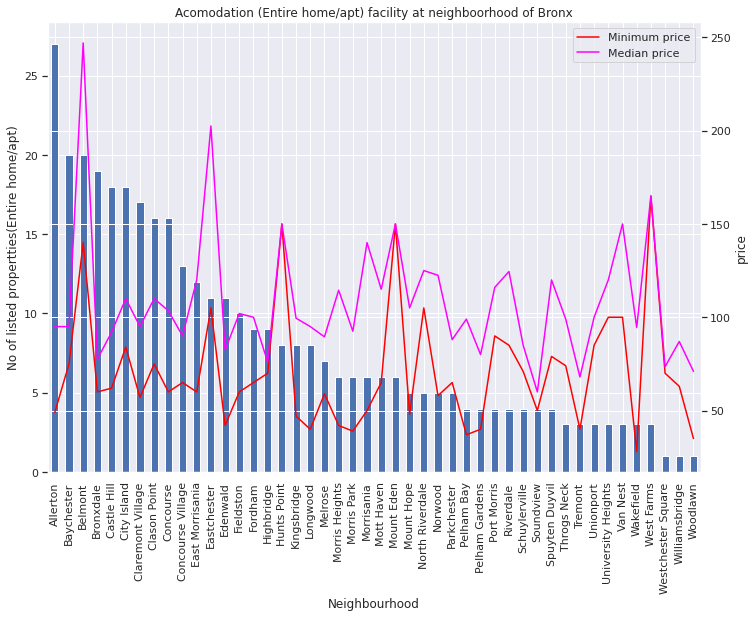

Number of neighborhoods in Bronx where rental housing (entire home/apt) is listed: 46


In [314]:
bronx_apt_room = bronx_data[bronx_data['room_type']=='Entire home/apt']
bro_ax1 =bronx_apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Entire home/apt)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Entire home/apt) facility at neighboorhood of Bronx')

ax2 = bro_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=bronx_apt_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=bronx_apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=bronx_apt_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Bronx where rental housing (entire home/apt) is listed: {bronx_apt_room["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **Bronx** depend on room type **shared room**

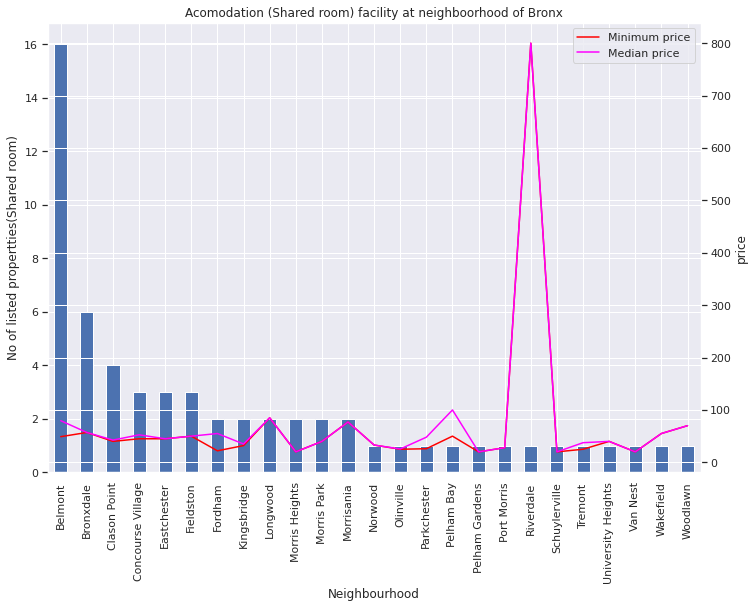

Number of neighborhoods in Bronx where rental housing (shared room) is listed: 25


In [315]:
bronx_shr_room = bronx_data[bronx_data['room_type']=='Shared room']
bronx_ax1 =bronx_shr_room['neighbourhood'].value_counts().plot(kind="bar",
                                                               ylabel='No of listed propertties(Shared room)',
                                                               xlabel='Neighbourhood',
                                                               title='Acomodation (Shared room) facility at neighboorhood of Bronx')

ax2 = bronx_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='Maximum price',
             data=bronx_shr_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=bronx_shr_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=bronx_shr_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Bronx where rental housing (shared room) is listed: {bronx_shr_room["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **Staten Island** depend on room type **Entire home/apt**

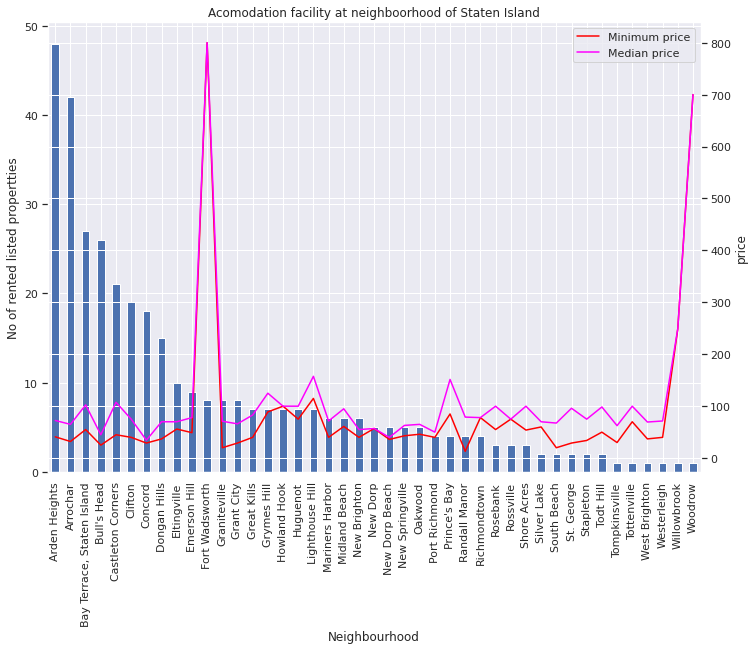

Number of neighborhoods in Staten Island where rental housing is listed: 43


In [316]:
staten_is_data = df[df['neighbourhood_group'] == 'Staten Island']

sta_ax1 = staten_is_data['neighbourhood'].value_counts().plot(kind="bar",
                                              ylabel='No of rented listed propertties',
                                              xlabel='Neighbourhood',
                                              title='Acomodation facility at neighboorhood of Staten Island')
ax2 = sta_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='purple',
             label='Maximum price',
             data=nei_max[nei_max['neighbourhood_group' ]== 'Staten Island'])'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=nei_min[nei_min['neighbourhood_group' ]== 'Staten Island'])
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=nei_avg[nei_avg['neighbourhood_group' ]== 'Staten Island'])
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Staten Island where rental housing is listed: {staten_is_data["neighbourhood"].nunique()}')

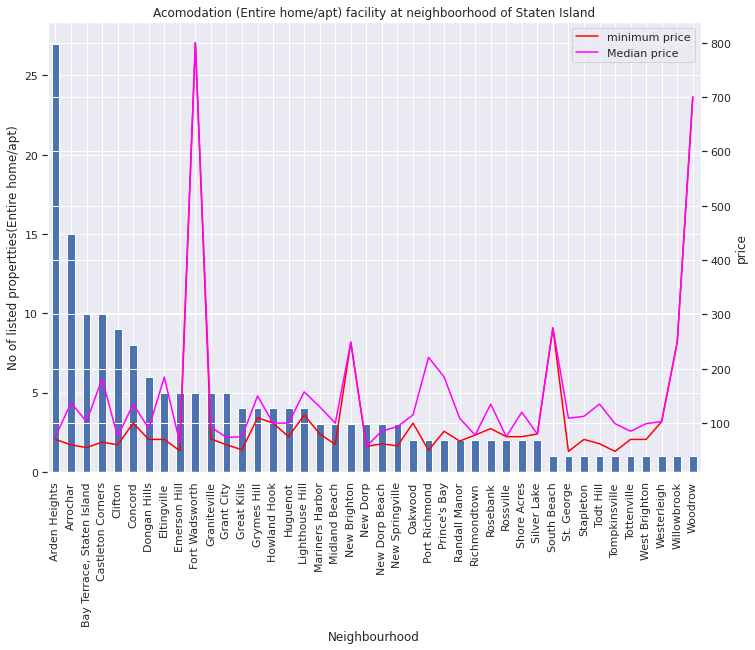

Number of neighborhoods in Staten Island where rental housing (entire home/apt) is listed: 42


In [317]:
staten_apt_room = staten_is_data[staten_is_data['room_type']=='Entire home/apt']
staten_ax1 =staten_apt_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Entire home/apt)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Entire home/apt) facility at neighboorhood of Staten Island')

ax2 = staten_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=staten_shr_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='minimum price',
             data=staten_apt_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=staten_apt_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Staten Island where rental housing (entire home/apt) is listed: {staten_apt_room["neighbourhood"].nunique()}')

###find out number of airbnb acomodation facility at neighboorhood of **Staten Island** depend on room type **Shared room**

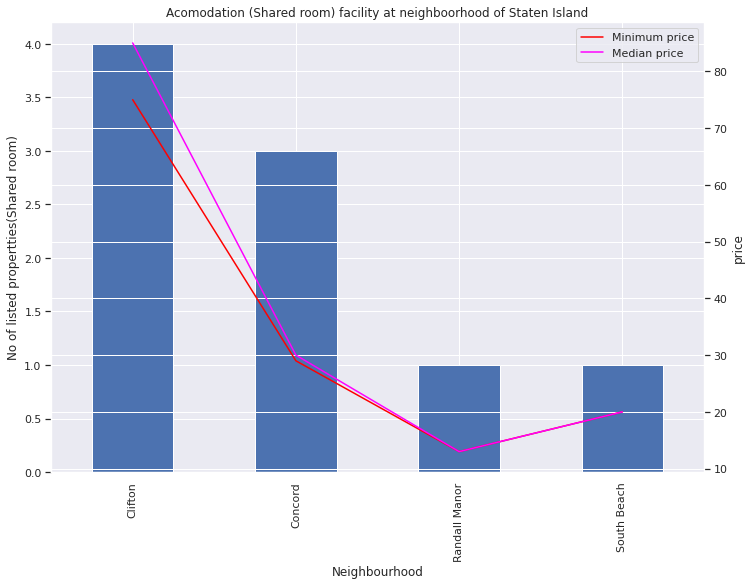

Number of neighborhoods in Staten Island where rental housing (shared room) is listed: 4


In [318]:
staten_shr_room = staten_is_data[staten_is_data['room_type']=='Shared room']
staten_ax1 =staten_shr_room['neighbourhood'].value_counts().plot(kind="bar",
                                                    ylabel='No of listed propertties(Shared room)',
                                                    xlabel='Neighbourhood',
                                                    title='Acomodation (Shared room) facility at neighboorhood of Staten Island')

ax2 = staten_ax1.twinx() # create axis 2 for prrice listing
'''sns.lineplot(x='neighbourhood', 
             y='price',
             color='green',
             label='maximum price',
             data=staten_shr_room.groupby(['neighbourhood'])['price'].max().reset_index())'''
sns.lineplot(x='neighbourhood', 
             y="price",
             color='red',
             label='Minimum price',
             data=staten_shr_room.groupby(['neighbourhood'])['price'].min().reset_index())
sns.lineplot(x='neighbourhood', 
             y="price",
             color='fuchsia',
             label='Median price',
             data=staten_shr_room.groupby(['neighbourhood'])['price'].median().reset_index())
plt.legend(loc='upper right') #set legend position
plt.show()
print(f'Number of neighborhoods in Staten Island where rental housing (shared room) is listed: {staten_shr_room["neighbourhood"].nunique()}')

#8. buisest host

In [319]:
#df.groupby(['availability_365','reviews_per_month']) and df['availability_365'>= 100]
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
av_365 = df.loc[~((df['availability_365'] <= 200) | (df['calculated_host_listings_count']<=50)| (df['reviews_per_month'] == 0))].reset_index()
av_365=av_365.groupby(["host_id",'host_name','calculated_host_listings_count'],as_index=False)['reviews_per_month','availability_365'].mean()
av_365.sort_values(['calculated_host_listings_count'],ascending=False,inplace=True)
av_365

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


host_id          host_name  calculated_host_listings_count  \
10  219517861       Sonder (NYC)                             327   
7   107434423         Blueground                             232   
5    30283594               Kara                             121   
8   137358866             Kazuya                             103   
2    12243051             Sonder                              96   
3    16098958     Jeremy & Laura                              96   
6    61391963  Corporate Housing                              91   
4    22541573                Ken                              87   
9   200380610            Pranjal                              65   
0     1475015               Mike                              52   
1     7503643               Vida                              52   

    reviews_per_month  availability_365  
10           1.992514        311.267760  
7            0.216667        295.041667  
5            0.091111        345.555556  
8            0.443684        241.473684  
2            0.304074        306.000000  
3            0.122456        309.912281  
6            0.297255        313.039216  
4            0.113333        337.111111  
9            1.000000        342.000000  
0            0.088780        340.341463  
1            0.099535        328.744186

In [320]:
av_365.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 10 to 1
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         11 non-null     int64  
 1   host_name                       11 non-null     object 
 2   calculated_host_listings_count  11 non-null     int64  
 3   reviews_per_month               11 non-null     float64
 4   availability_365                11 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 528.0+ bytes


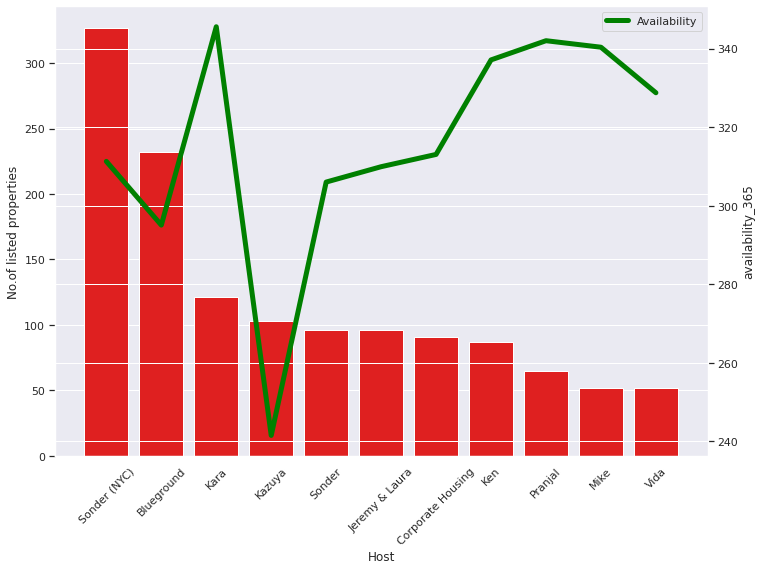

In [321]:

sns.set(rc={'figure.figsize':(11.7,8.27)}) #set figure size
ax_ava = sns.barplot(x="host_name",
                 y="calculated_host_listings_count", 
                 data=av_365,color="red")

ax_ava.set(ylabel="No.of listed properties",
           xlabel="Host")
plt.xticks(rotation=45)

ax2_ava = ax_ava.twinx() # create axis 2 for prrice listing
ax2_ava = sns.lineplot(x='host_name', 
             y='availability_365',
             color='green',
             label='Availability',
             linewidth=5,
             data=av_365)
ax2_ava.legend(ncol=2, 
               loc="upper right")
plt.show()

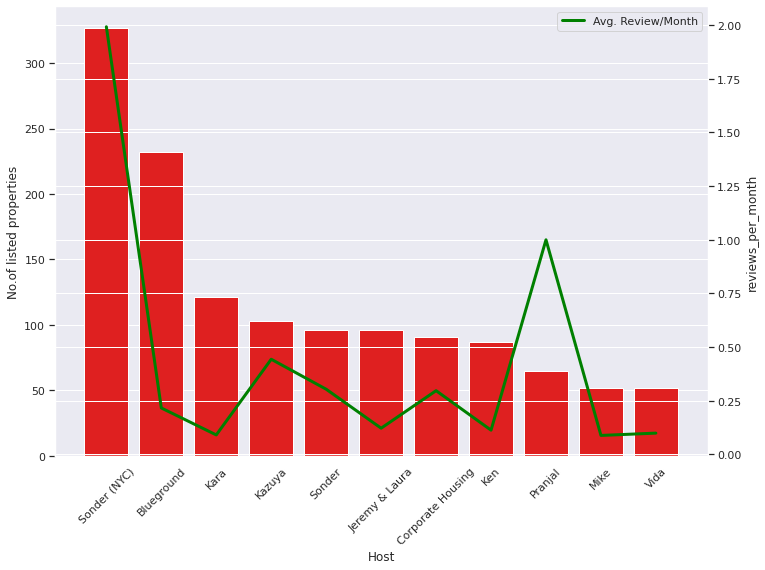

In [322]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #set figure size
ax_rev = sns.barplot(x="host_name",
                 y="calculated_host_listings_count",
                 data=av_365,color="red")
plt.xticks(rotation=45)

ax_rev.set(ylabel="No.of listed properties",
       xlabel="Host")
ax2_rev = ax_rev.twinx() # create axis 2 for reviews_per_month

ax2_rev = sns.lineplot(x='host_name', 
             y='reviews_per_month',
             color='green',
             label='Avg. Review/Month',
             lw=3,
             data=av_365)
ax2_rev.legend(ncol=2, loc="upper right")
plt.show()

In [323]:
#extracting list of top 10 most busy host by sum of reviews per month
top_10_review_host_list=df.groupby(['host_id']).agg({'reviews_per_month':'sum','price':'median'}).sort_values('reviews_per_month',ascending=False).reset_index()[:10]['host_id'].tolist()
# making a df for top 10 hosts 
top_10_review_host=df[df.host_id.isin(top_10_review_host_list)]
top_10_review_host['host_name_id']=top_10_review_host['host_name']+' ('+top_10_review_host['host_id'].map(str)+')'
top_10_review_host['neighbourhood'] = top_10_review_host['neighbourhood'] +' (' + top_10_review_host['neighbourhood_group'] + ')'

#grouping the values by host name and taking total of reviews per month
temp_top_10_review_host=top_10_review_host.groupby('host_name_id').agg({'reviews_per_month':'sum','price':'median'}).sort_values('reviews_per_month',ascending=False).reset_index()
temp_top_10_review_host=temp_top_10_review_host.rename(columns={'reviews_per_month':'total_reviews_per_month','price':'median price'})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


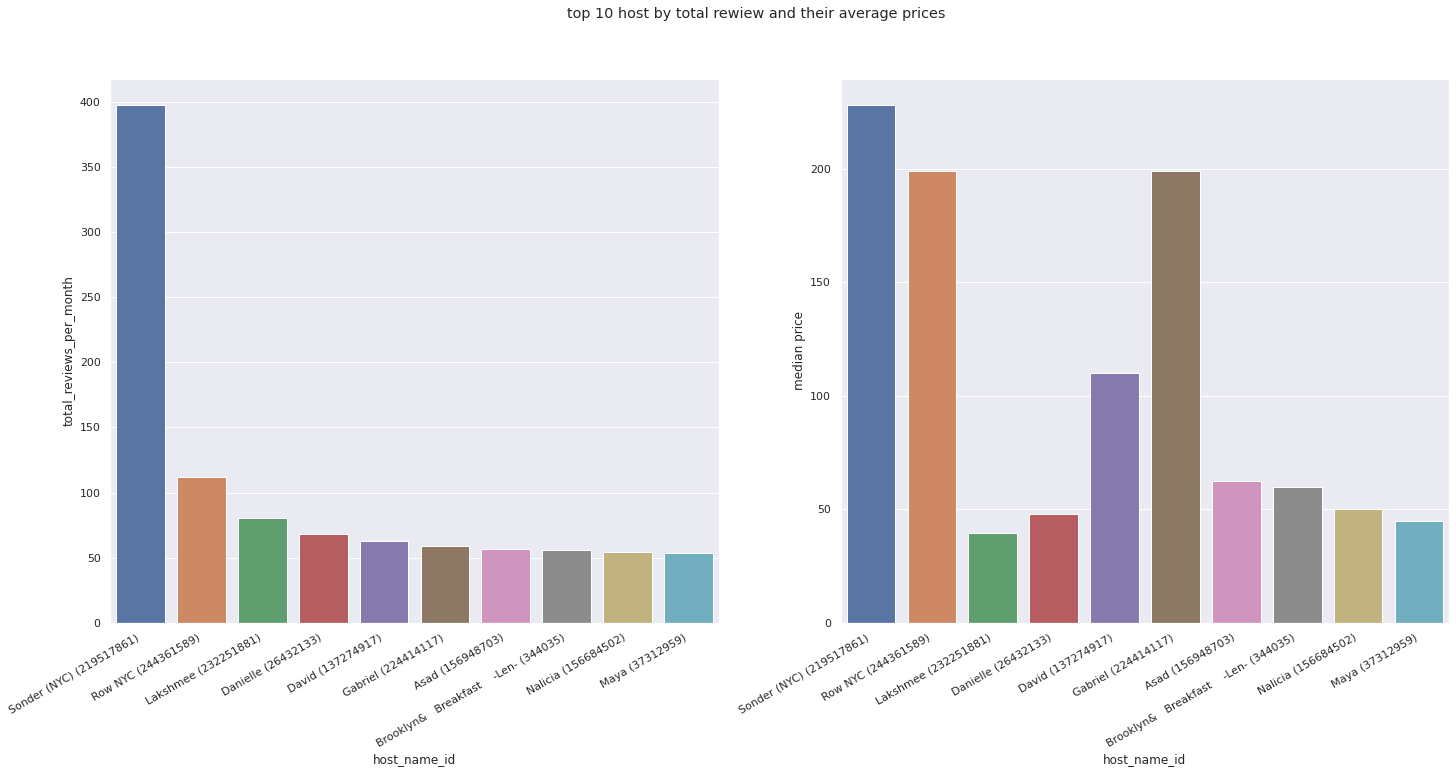

In [324]:
fig, axes = plt.subplots(1,2, figsize=(24, 10))
fig.suptitle('top 10 host by total rewiew and their average prices ')
#ploting a graph of host name vs total reviews per month
sns.barplot(ax=axes[0],x="host_name_id", y='total_reviews_per_month' ,data=temp_top_10_review_host)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha='right')
#ploting a graph of host name vs  median price
sns.barplot(ax=axes[1],x='host_name_id',y='median price',data=temp_top_10_review_host)
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha='right')
plt.show()

In [325]:
  top_10_review_host

id                                               name    host_id  \
7086    5115372  Comfy Room Family Home LGA Airport NO CLEANING...   26432133   
9323    7125107             Room steps away from LaGuardia airport   37312959   
9689    7453537         Lg Prospect Hts Room at Brooklyn&Breakfast     344035   
10420   7979237               New Guest Room at Brooklyn&Breakfast     344035   
10544   8097567             Giant Sunny Room at Brooklyn&Breakfast     344035   
...         ...                                                ...        ...   
47691  35871510  Sonder | 116 John | Vibrant Studio + Fitness Room  219517861   
47692  35871511     Sonder | 116 John | Vibrant 1BR + Fitness Room  219517861   
47693  35871515         Sonder | 116 John | Stunning 1BR + Rooftop  219517861   
47814  35936418          Sonder | 116 John | Polished Studio + Gym  219517861   
47821  35937891            Sonder | 116 John | Simple Studio + Gym  219517861   

                            host_name neighbourhood_group  \
7086                         Danielle              Queens   
9323                             Maya              Queens   
9689   Brooklyn&   Breakfast    -Len-            Brooklyn   
10420  Brooklyn&   Breakfast    -Len-            Brooklyn   
10544  Brooklyn&   Breakfast    -Len-            Brooklyn   
...                               ...                 ...   
47691                    Sonder (NYC)           Manhattan   
47692                    Sonder (NYC)           Manhattan   
47693                    Sonder (NYC)           Manhattan   
47814                    Sonder (NYC)           Manhattan   
47821                    Sonder (NYC)           Manhattan   

                        neighbourhood  latitude  longitude        room_type  \
7086           East Elmhurst (Queens)  40.76374  -73.87103     Private room   
9323           East Elmhurst (Queens)  40.77005  -73.87691     Private room   
9689      Prospect Heights (Brooklyn)  40.67883  -73.97051     Private room   
10420     Prospect Heights (Brooklyn)  40.67960  -73.96948     Private room   
10544     Prospect Heights (Brooklyn)  40.67811  -73.97126     Private room   
...                               ...       ...        ...              ...   
47691  Financial District (Manhattan)  40.70818  -74.00631  Entire home/apt   
47692  Financial District (Manhattan)  40.70691  -74.00682  Entire home/apt   
47693  Financial District (Manhattan)  40.70772  -74.00673  Entire home/apt   
47814  Financial District (Manhattan)  40.70840  -74.00518  Entire home/apt   
47821  Financial District (Manhattan)  40.70707  -74.00557  Entire home/apt   

       price  minimum_nights  number_of_reviews last_review  \
7086      54               1                430  2019-07-03   
9323      45               1                448  2019-07-07   
9689      70               1                258  2019-06-30   
10420     60               1                197  2019-07-01   
10544     85               1                222  2019-06-27   
...      ...             ...                ...         ...   
47691    135              29                  0         NaT   
47692    165              29                  0         NaT   
47693    165              29                  0         NaT   
47814    699              29                  0         NaT   
47821    699              29                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
7086               13.45                               5               347   
9323                9.63                               5               166   
9689                5.45                              13               320   
10420               4.19                              13               324   
10544               4.98                              13               290   
...                  ...                             ...               ...   
47691               0.00                             32

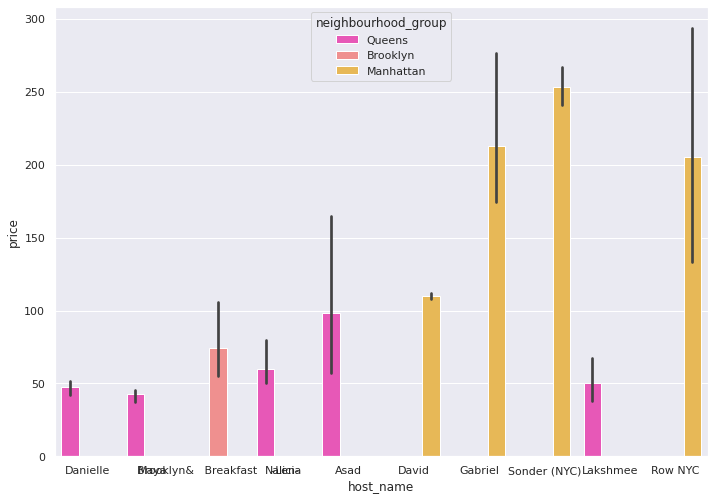

In [326]:
sns.barplot(x='host_name', y='price', data=top_10_review_host, hue='neighbourhood_group', palette='spring')
plt.show()

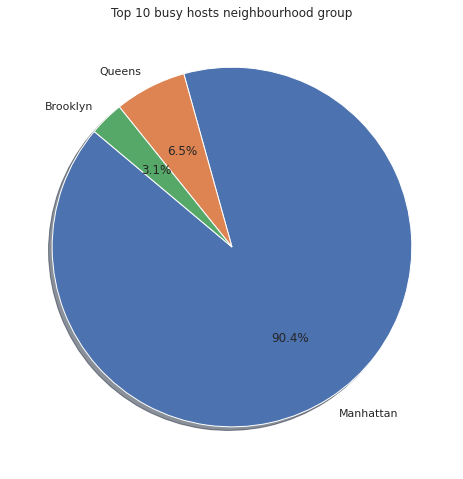

In [327]:
label=top_10_review_host['neighbourhood_group'].value_counts().index.to_list()
plt.pie(top_10_review_host['neighbourhood_group'].value_counts(),labels=label, autopct='%1.1f%%',shadow=True,startangle=140)
plt.title("Top 10 busy hosts neighbourhood group")
plt.show()

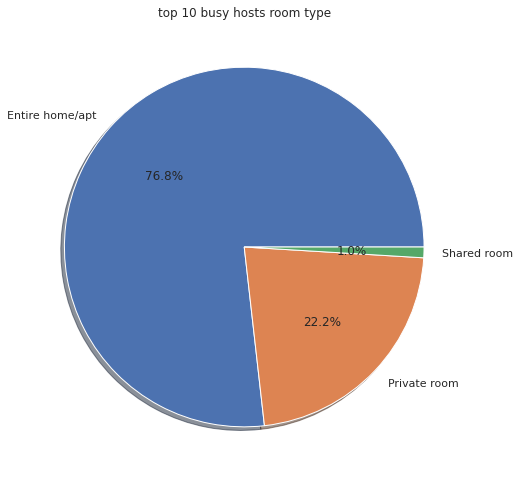

In [328]:
label=top_10_review_host['room_type'].value_counts().index.to_list()
plt.pie(top_10_review_host['room_type'].value_counts(),labels=label, autopct='%1.1f%%',shadow=True)
plt.title("top 10 busy hosts room type")
plt.show()

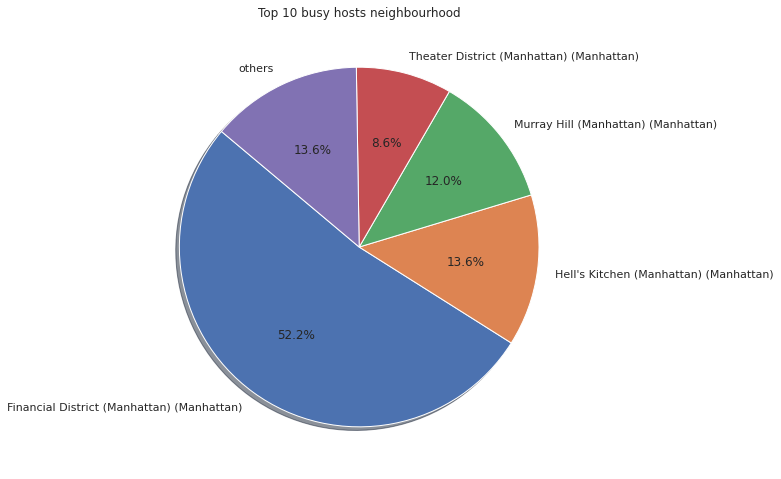

In [329]:
#the full dataframe
df_pie=top_10_review_host.copy()
df_pie['neighbourhood']=top_10_review_host['neighbourhood'] + ' ('+ top_10_review_host['neighbourhood_group']+')'
df_pie = df_pie['neighbourhood'].value_counts().reset_index().rename(columns={"index": "neighbourhood", "neighbourhood": "no_of_homes"})
  #the top 5
df2 = df_pie[:4].copy()

#others
new_row = pd.DataFrame(data = {'neighbourhood' : ['others'], 'no_of_homes' : [df_pie['no_of_homes'][4:].sum()]})

#combining top 5 with others
df2 = pd.concat([df2, new_row])
labels = df2['neighbourhood']
pie=plt.pie(x='no_of_homes',data=df2,labels=labels, autopct='%1.1f%%',startangle=140,shadow=True)
# plt.legend(pie[0],labels, bbox_to_anchor=(0.6,0.5), loc="center right", fontsize=10, 
#            bbox_transform=plt.gcf().transFigure)
# plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
plt.title("Top 10 busy hosts neighbourhood")
plt.show()

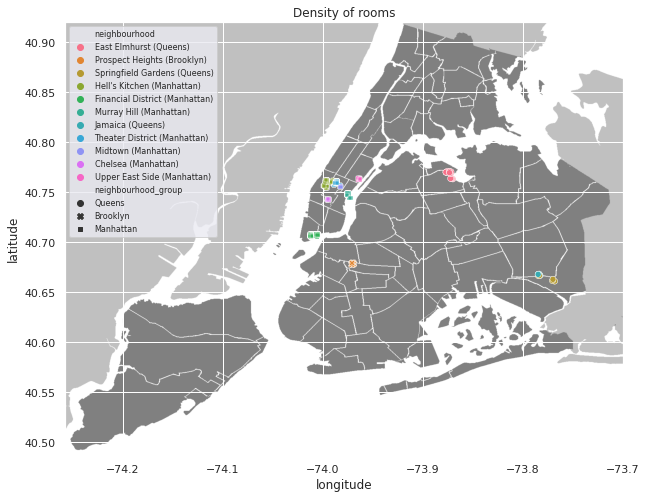

In [330]:
data = top_10_review_host[["latitude","longitude",'neighbourhood_group','host_name','neighbourhood']]
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#adding the image from wikipedia
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
#reading the image
image=plt.imread(img)
#scaling img with max latitude and logtitude and makeig some minor adgustment to fit the points
plt.imshow(image,zorder=0,extent=[-74.258, -73.7, 40.488, 40.92])
#creating an scaterplot
sns.scatterplot(data = data,x='longitude',y='latitude',hue='neighbourhood',style="neighbourhood_group" ).set_title('Density of rooms')
plt.legend(loc="upper left", frameon=True, fontsize=8)
plt.show()

In [331]:
top_10_review_host.head()

id                                               name   host_id  \
7086   5115372  Comfy Room Family Home LGA Airport NO CLEANING...  26432133   
9323   7125107             Room steps away from LaGuardia airport  37312959   
9689   7453537         Lg Prospect Hts Room at Brooklyn&Breakfast    344035   
10420  7979237               New Guest Room at Brooklyn&Breakfast    344035   
10544  8097567             Giant Sunny Room at Brooklyn&Breakfast    344035   

                            host_name neighbourhood_group  \
7086                         Danielle              Queens   
9323                             Maya              Queens   
9689   Brooklyn&   Breakfast    -Len-            Brooklyn   
10420  Brooklyn&   Breakfast    -Len-            Brooklyn   
10544  Brooklyn&   Breakfast    -Len-            Brooklyn   

                     neighbourhood  latitude  longitude     room_type  price  \
7086        East Elmhurst (Queens)  40.76374  -73.87103  Private room     54   
9323        East Elmhurst (Queens)  40.77005  -73.87691  Private room     45   
9689   Prospect Heights (Brooklyn)  40.67883  -73.97051  Private room     70   
10420  Prospect Heights (Brooklyn)  40.67960  -73.96948  Private room     60   
10544  Prospect Heights (Brooklyn)  40.67811  -73.97126  Private room     85   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
7086                1                430  2019-07-03              13.45   
9323                1                448  2019-07-07               9.63   
9689                1                258  2019-06-30               5.45   
10420               1                197  2019-07-01               4.19   
10544               1                222  2019-06-27               4.98   

       calculated_host_listings_count  availability_365  \
7086                                5               347   
9323                                5               166   
9689                               13               320   
10420                              13               324   
10544                              13               290   

                                  host_name_id  
7086                       Danielle (26432133)  
9323                           Maya (37312959)  
9689   Brooklyn&   Breakfast    -Len- (344035)  
10420  Brooklyn&   Breakfast    -Len- (344035)  
10544  Brooklyn&   Breakfast    -Len- (344035)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

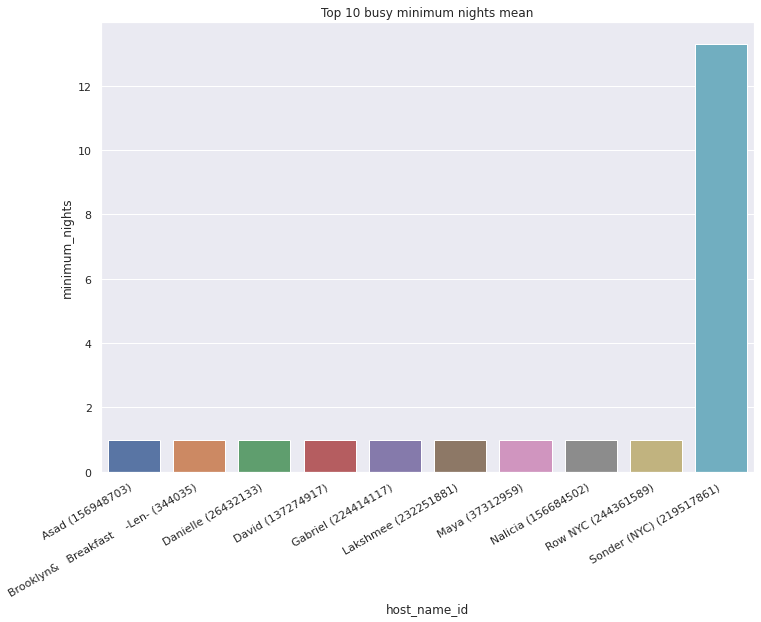

In [332]:
top_10_nights_mean = top_10_review_host.groupby('host_name_id').minimum_nights.mean().reset_index()
sns.barplot(x='host_name_id', y='minimum_nights', data=top_10_nights_mean)
plt.title("Top 10 busy minimum nights mean")
plt.xticks(rotation=30,ha='right')

#6. geo map (Is there any noticeable difference of traffic among different areas and what could be the reason for it?) <br>

manhattan finicial district has most number of traffic among different neighbourhood group.The district comprises the offices and headquarters of many of the city's major financial institutions, including the New York Stock Exchange and the Federal Reserve Bank of New York. Anchored on Wall Street in the Financial District, New York City has been called both the most financially powerful city and the leading financial center of the world

In [333]:
#to create price heat map on map we can use latitude and longitude
listing = df.loc[:,['longitude','latitude','price','availability_365']]
listing.head(3)

longitude  latitude  price  availability_365
0  -73.97237  40.64749    149               365
1  -73.98377  40.75362    225               355
2  -73.94190  40.80902    150               365

Text(0.5, 1.0, 'Density of rooms')

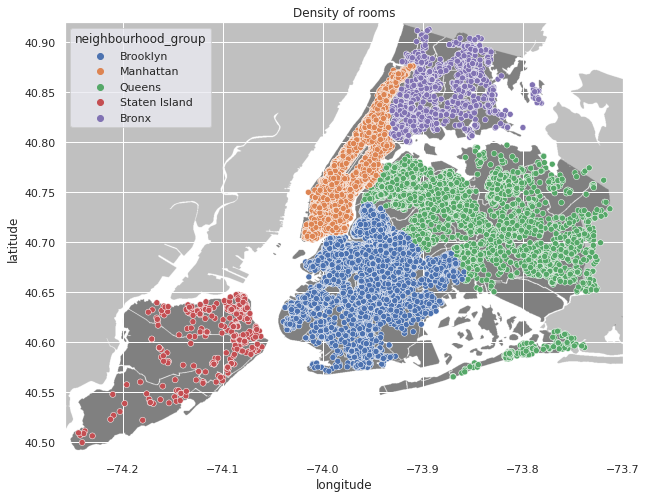

In [334]:
data = df[["latitude","longitude",'neighbourhood_group']]
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#adding the image from wikipedia
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
#reading the image
image=plt.imread(img)
#scaling img with max latitude and logtitude and makeig some minor adgustment to fit the points
plt.imshow(image,zorder=0,extent=[-74.258, -73.7, 40.488, 40.92])
#creating an scaterplot
sns.scatterplot(data = data,x='longitude',y='latitude',hue='neighbourhood_group').set_title('Density of rooms')


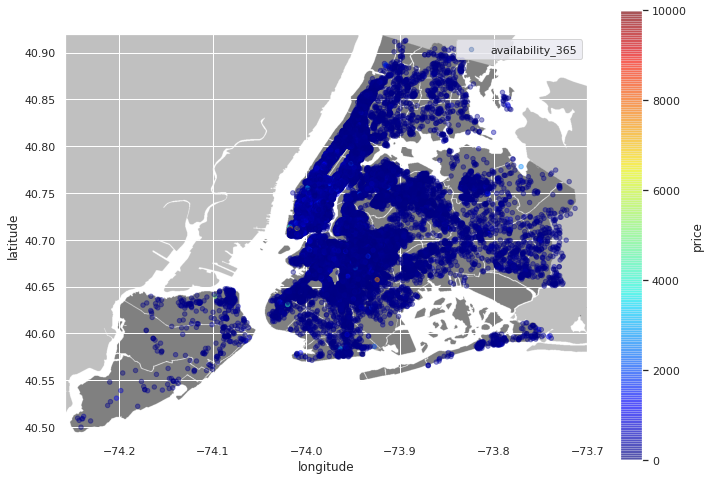

In [335]:
import urllib
sns.set(rc={'figure.figsize':(11.7,8.27)}) 
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
listing.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

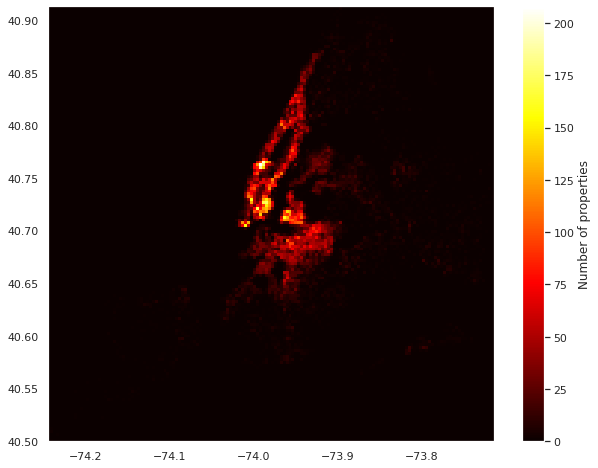

In [336]:
plt.figure(figsize = (10,8))
plt.hist2d(df.longitude, df.latitude, bins=150, cmap='hot')
plt.colorbar().set_label('Number of properties')

Now we can see how the listings are plotted into a map. For a better understanding of the listings density, we can use the folium heat map

In [337]:


import folium
from folium.plugins import HeatMap
from folium import plugins



In [338]:
map_NYC = folium.Map([40.80902,-73.94190],zoom_start=7)

In [339]:
station = df[['latitude','longitude']]
# convert to (n, 2) nd-array format for heatmap
stationArr = station.values

# plot heatmap
map_NYC.add_child(plugins.HeatMap(stationArr, radius=15))
map_NYC

Out of all the listings, Manhattan has 43% and Brooklyn has 39% of listings. This might be because Manhattan is the economic heart of the city, with a huge no of skyscrapers containing countless offices and world-famous tourist attractions such as Times Square, 5th Ave, The Central Park, and for business in wall street for stock exchange.
and because of its importance, it has high prices and has large hotel density in and near manhattan is more which state that people like to stay near manhattan to avoid traffic and time delay to work

# 9. Which hosts are more popular and why?

In [340]:
#extracting list of top 10 most busy host by listing
top_10_popular_host_list=df.groupby(['host_id']).id.count().sort_values(ascending=False).reset_index()[:10]['host_id'].tolist()
# making a df for top 10 hosts 
top_10_popular_host=df[df.host_id.isin(top_10_popular_host_list)]
top_10_popular_host['host_name_id']=top_10_popular_host['host_name']+' ('+top_10_popular_host['host_id'].map(str)+')'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [341]:
# First let's get the median amount the top 10 receive per night
top10_median = top_10_popular_host.groupby('host_name').price.median().reset_index().rename(columns={'price':'median price'})
top10_mean = top_10_popular_host.groupby('host_name').price.mean().reset_index()
# Barplot showing how much people pay for the rentals of the top 10 hosts
plt.figure(figsize=(17,8))


<Figure size 1224x576 with 0 Axes>

<Figure size 1224x576 with 0 Axes>

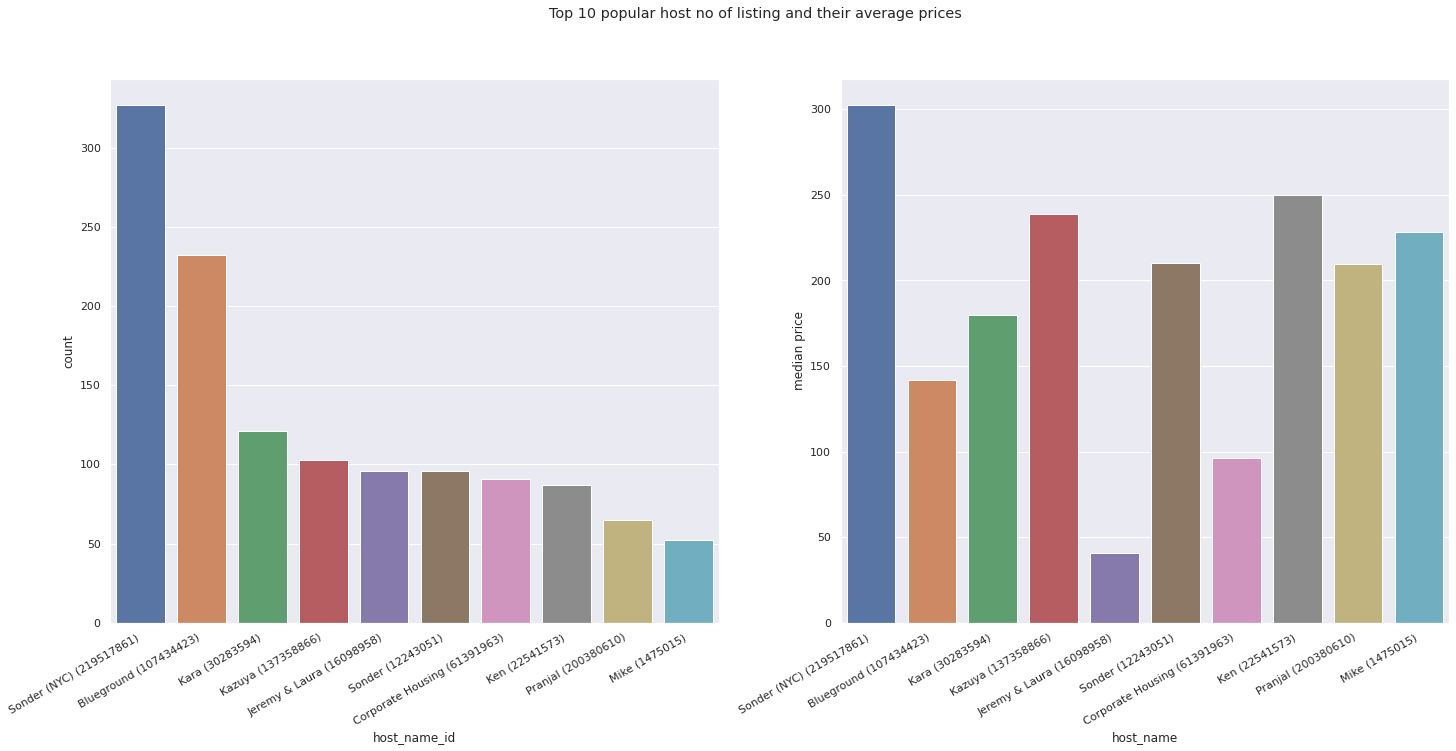

In [342]:
fig, axes = plt.subplots(1,2, figsize=(24, 10))
fig.suptitle('Top 10 popular host no of listing and their average prices ')
#ploting a graph of host name vs total reviews per month
sns.countplot(ax=axes[0],x='host_name_id',data=top_10_popular_host,order=top_10_popular_host.host_name_id.value_counts().iloc[:10].index)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha='right')
#ploting a graph of host name vs  median price
sns.barplot(ax=axes[1],x='host_name', y='median price', data=top10_median)
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha='right')
plt.show()

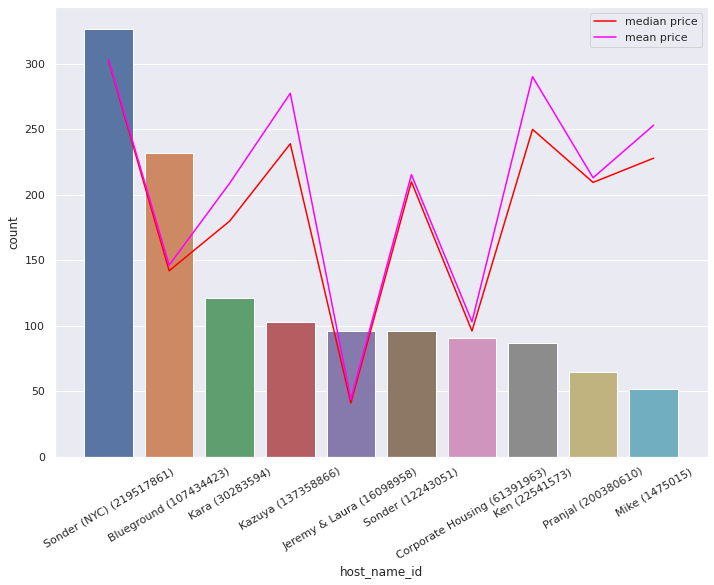

In [343]:
sns.countplot(x='host_name_id',data=top_10_popular_host,order=top_10_popular_host.host_name_id.value_counts().iloc[:10].index)
plt.xticks(rotation=30)

sns.lineplot(x='host_name', 
             y="median price",
             color='red',
             label='median price',
             data=top10_median)
sns.lineplot(x='host_name', 
             y="price",
             color='fuchsia',
             label='mean price',
             data=top10_mean)
plt.show()

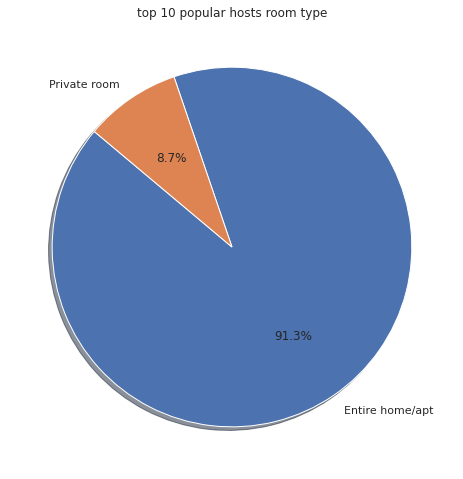

In [344]:
label=top_10_popular_host['room_type'].value_counts().index.to_list()
plt.pie(top_10_popular_host['room_type'].value_counts(),labels=label, autopct='%1.1f%%',shadow=True,startangle=140)
plt.title("top 10 popular hosts room type")
plt.show()

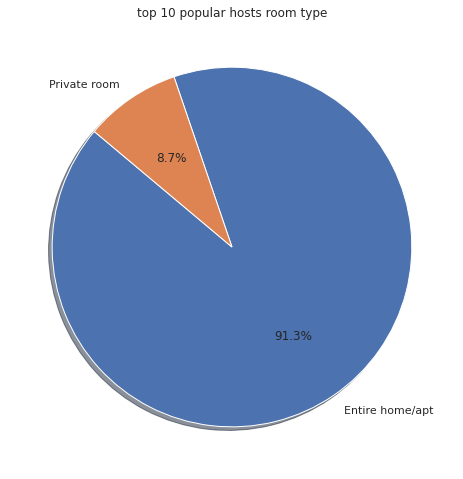

In [345]:
label=top_10_popular_host['room_type'].value_counts().index.to_list()
plt.pie(top_10_popular_host['room_type'].value_counts(),labels=label, autopct='%1.1f%%',shadow=True,startangle=140)
plt.title("top 10 popular hosts room type")
plt.show()

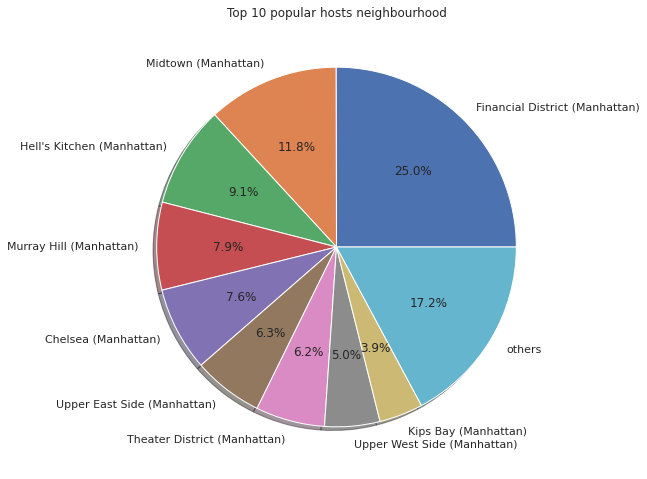

In [346]:
#the full dataframe
df_pie=top_10_popular_host.copy()
df_pie['neighbourhood']=top_10_popular_host['neighbourhood'] + ' ('+ top_10_popular_host['neighbourhood_group']+')'
df_pie = df_pie['neighbourhood'].value_counts().reset_index().rename(columns={"index": "neighbourhood", "neighbourhood": "no_of_homes"})
  #the top 5
df2 = df_pie[:9].copy()

#others
new_row = pd.DataFrame(data = {'neighbourhood' : ['others'], 'no_of_homes' : [df_pie['no_of_homes'][9:].sum()]})

#combining top 5 with others
df2 = pd.concat([df2, new_row])
labels = df2['neighbourhood']
pie=plt.pie(x='no_of_homes',data=df2,labels=labels, autopct='%1.1f%%',shadow=True)
# plt.legend(pie[0],labels, bbox_to_anchor=(0.6,0.5), loc="center right", fontsize=10, 
#            bbox_transform=plt.gcf().transFigure)
# plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
plt.title("Top 10 popular hosts neighbourhood")
plt.show()

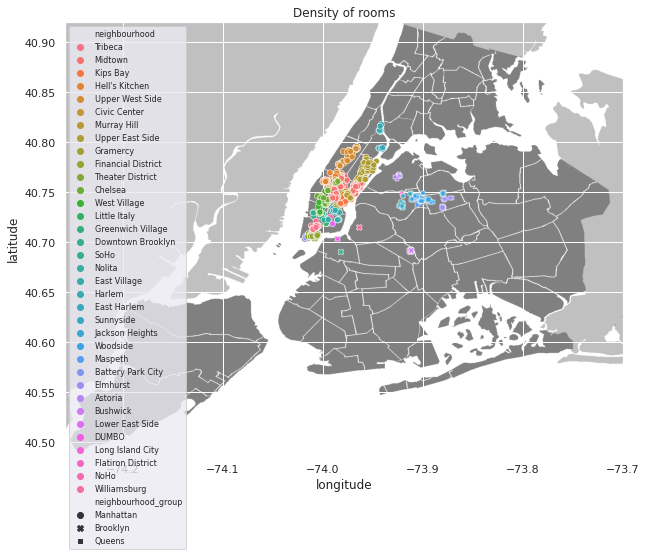

In [347]:
data = top_10_popular_host[["latitude","longitude",'neighbourhood_group','host_name','neighbourhood']]
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#adding the image from wikipedia
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
#reading the image
image=plt.imread(img)
#scaling img with max latitude and logtitude and makeig some minor adgustment to fit the points
plt.imshow(image,zorder=0,extent=[-74.258, -73.7, 40.488, 40.92])
#creating an scaterplot
sns.scatterplot(data = data,x='longitude',y='latitude',hue='neighbourhood',style="neighbourhood_group" ).set_title('Density of rooms')
plt.legend(loc="upper left", frameon=True, fontsize=8)

1) These top 10 have room prices over the average this might be because they have room in the most expensive part of new york. 

2) They probably focus on business rentals over-tourism rentals because 

  1. After searching on  Internet, I saw that Sonder, Blueground are rental companies in NYC.

  2. corporate houses in its name suggests that people are used more for buisenss rentals 

  3.The graphic that shows the top 10 with an average rental length of 30 days which is higher than the mean of the entire data set i.e  7  days.
30 days looks more like a business rental than a vacation. 

# 13) Ideal room conditions to gain max out of it 

1. Price range shoud be betwenn 50 and 200.
2. location should be either lower Manhattan or near Manhattan in Brooklyn or near key locations such as an airport
3. If in Manhattan the room type should be an entire home or private in any other borough
4. Minimum night requirement should be either between 1-3  for holiday booking and 30 days for buisness bookings.


## 13.1) which neighbourhood_group(city)  has more no of listings and of which type ? <br>
we can also use que number 4 solution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Neighbourhood group')

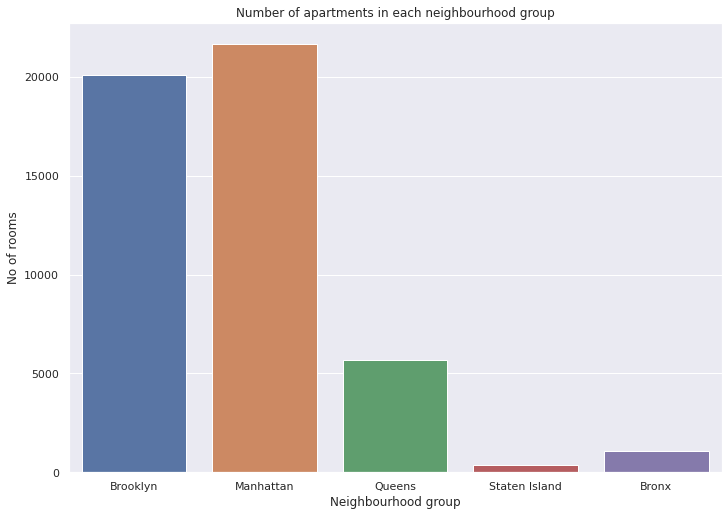

In [348]:
#creating a count plot 
sns.countplot(df.neighbourhood_group).set_title('Number of apartments in each neighbourhood group')
#adding x and y labels to the plot
plt.ylabel('No of rooms')
plt.xlabel('Neighbourhood group')

Text(0.5, 0, 'Neighbourhood group')

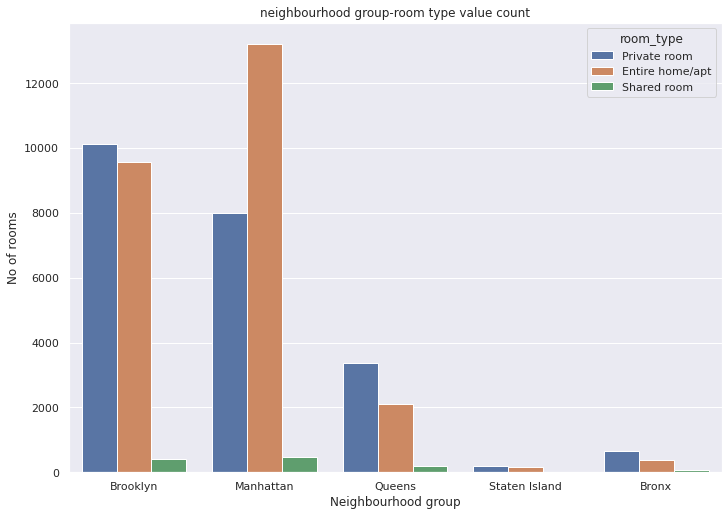

In [349]:
#creating a count plot
sns.countplot(data=df,x='neighbourhood_group',hue='room_type').set_title('neighbourhood group-room type value count')
#adding x and y labels to the plot
plt.ylabel('No of rooms')
plt.xlabel('Neighbourhood group')

Observation
1. We can see that most no of rooms are in Manhattan followed by brooklyn and queens
2. Manhattan people prefer to book an entire home rather than a private room. Brooklyn, both have approx equal no of count while people do not prefer a shared room in either of the city.

## 13.2) which neighbourhood has more no of listings and of which type 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'No of rooms')

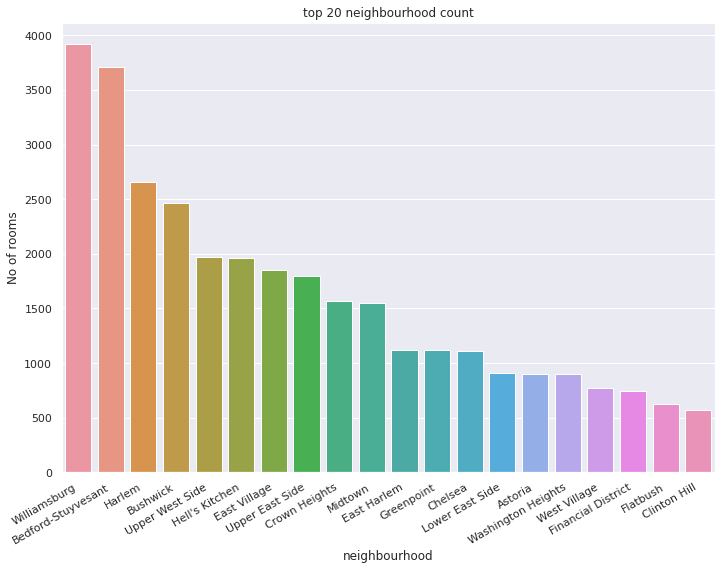

In [350]:
#creating a count plot
sns.countplot(df.neighbourhood, order = df.neighbourhood.value_counts().iloc[:20].index ).set_title('top 20 neighbourhood count')
#rotating the x axis labels 
plt.xticks(rotation=30,ha='right')
#adding x and y labels to the plot
plt.ylabel('No of rooms')


Text(0.5, 1.0, 'Top 15 areas that have highest number of listing')

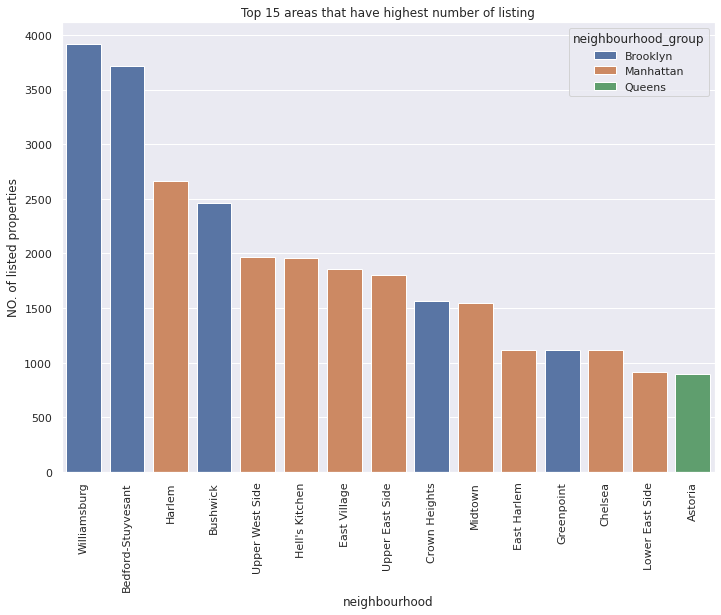

In [351]:
#top planning areas
top_planing_area=df.groupby(['neighbourhood_group']).neighbourhood.value_counts(ascending=True).sort_values(ascending=False).head(15).to_frame('NO. of listed properties').reset_index()
a=sns.barplot(x='neighbourhood',y='NO. of listed properties',hue='neighbourhood_group',data=top_planing_area,dodge = False)
plt.xticks(rotation=90)
a.set_title('Top 15 areas that have highest number of listing')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'No of rooms')

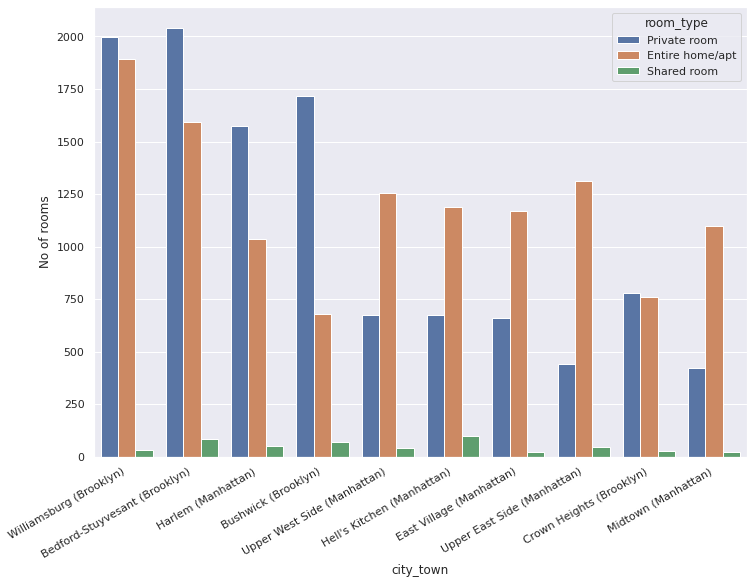

In [352]:
city_town_df=df.copy()
city_town_df['city_town']=df['neighbourhood']+' ('+df['neighbourhood_group']+')'
sns.countplot(city_town_df.city_town, order = city_town_df.city_town.value_counts().iloc[:10].index ,hue=df['room_type'])
#rotating the x axis labels 
plt.xticks(rotation=30,ha='right')
#adding x and y labels to the plot
plt.ylabel('No of rooms')


observations 

1) all the top 10 neighbourhood are from brooklyn and manhattan

2) brooklyn has  almost equal no of private and entire apt room type

3) manhatan has more no of entire apt than private and shared room combined

## 13.3) price distribution across different neighbourhood

In [353]:
city_room_type_df=df.groupby(['neighbourhood_group','room_type']).agg({'price':'median'}).sort_values('price',ascending=False).reset_index().rename(columns={"price": "median_price"})
neighbourhood_group_df=df.groupby(['neighbourhood_group']).agg({'price':'median'}).sort_values('price',ascending=False).reset_index().rename(columns={"price": "median_price"})


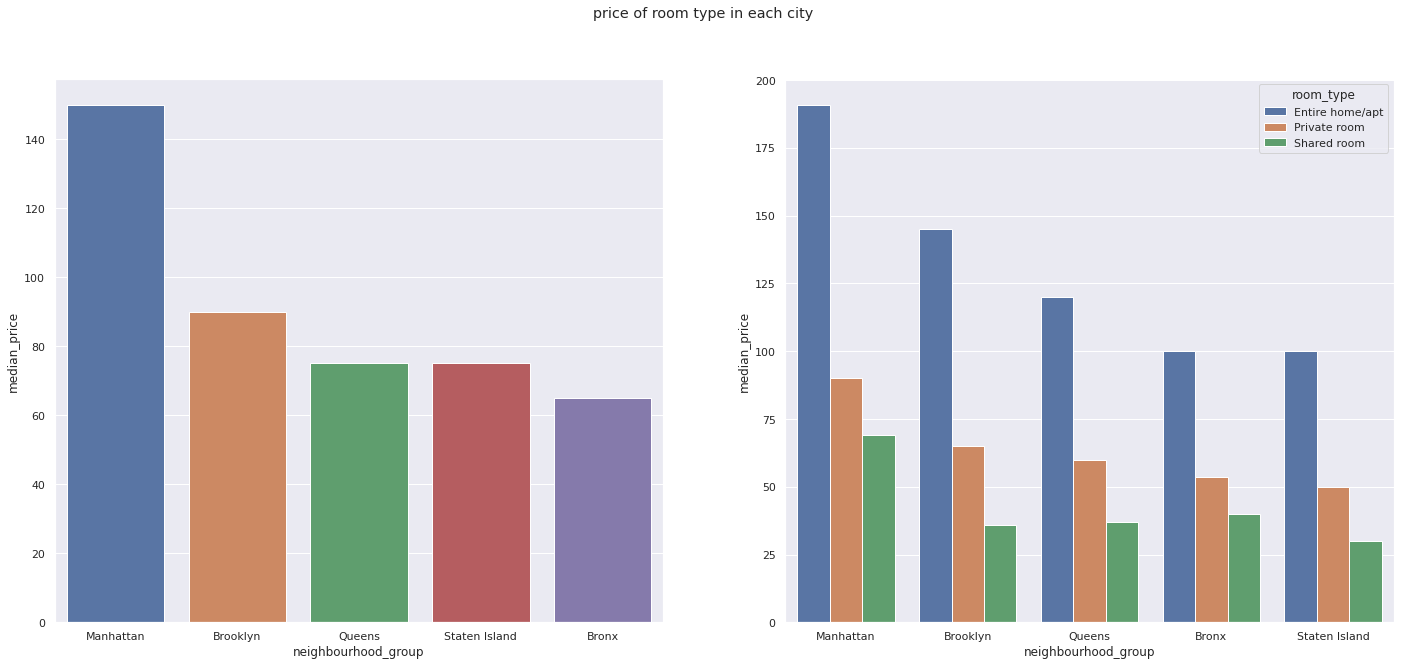

In [354]:
fig, axes = plt.subplots(1,2, figsize=(24, 10))
fig.suptitle('price of room type in each city')
sns.barplot(ax=axes[0],data=neighbourhood_group_df,x='neighbourhood_group',y='median_price')
sns.barplot(ax=axes[1],data=city_room_type_df,x='neighbourhood_group',hue='room_type',y='median_price')

Observations

Among all the cities manhattan houses are most expensive for all the room types followed by Brooklyn and Bronx are least expensive


Text(0.5, 1.0, 'Density and distribution of prices under 500 for each neighberhood_group')

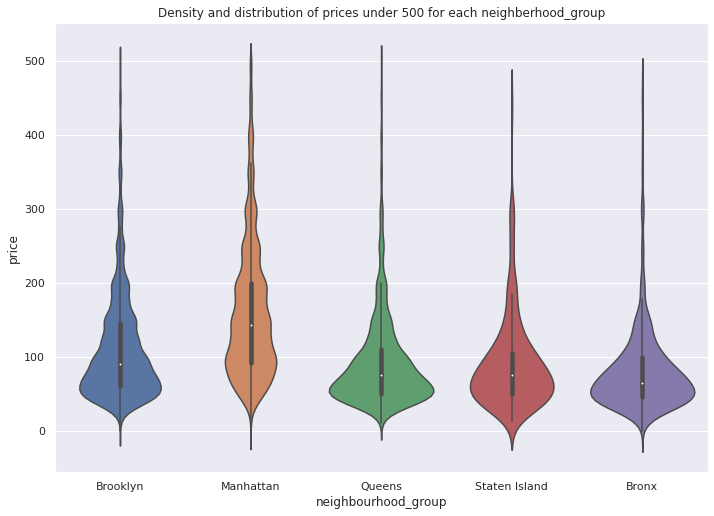

In [355]:
#creating a sub-dataframe with  extreme values  less than 500
sub_df=df[df.price < 500]
#using violinplot to showcase density and distribtuion of prices 
sns.violinplot(data=sub_df, x='neighbourhood_group', y='price').set_title('Density and distribution of prices under 500 for each neighberhood_group')



Observations

In this violin plot, we can observe the distribution of prices. We can state that Manhattan has the highest range of prices with an average of 150, Brooklyn with 90. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest.
We can conclude that Manhattan is one of the most expensive places followed by Brooklyn and Queens.


## 13.4) what price range of rooms are more


Text(0, 0.5, 'No of rooms')

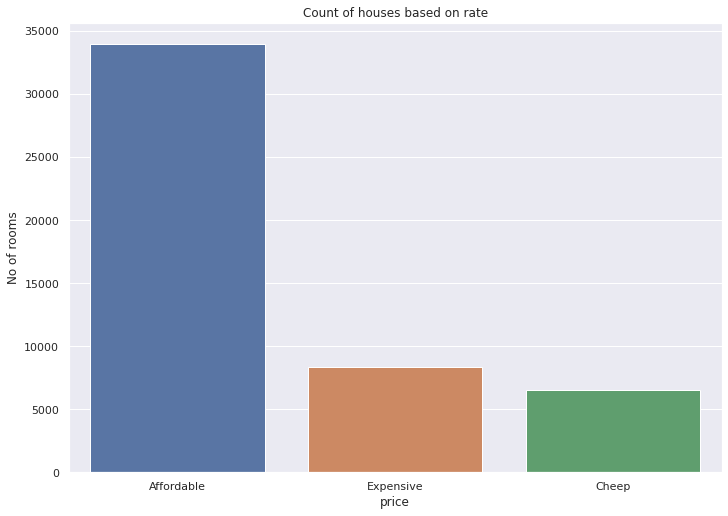

In [356]:
'''
dividing price range in 3 groups 
1) cheep i.e price below 50
2) affordable i.e price betwenn 50 & 200
3) expensive i.e price above 200
'''
def price_catagory(price):
  if price<=50:
    return 'Cheep'
  elif price>=50 and price<=200:
    return 'Affordable'
  else:
    return 'Expensive'
#creating a count plot 
sns.countplot(x=df.price.apply(price_catagory)).set_title('Count of houses based on rate')
#adding y label to the plot
plt.ylabel('No of rooms') 

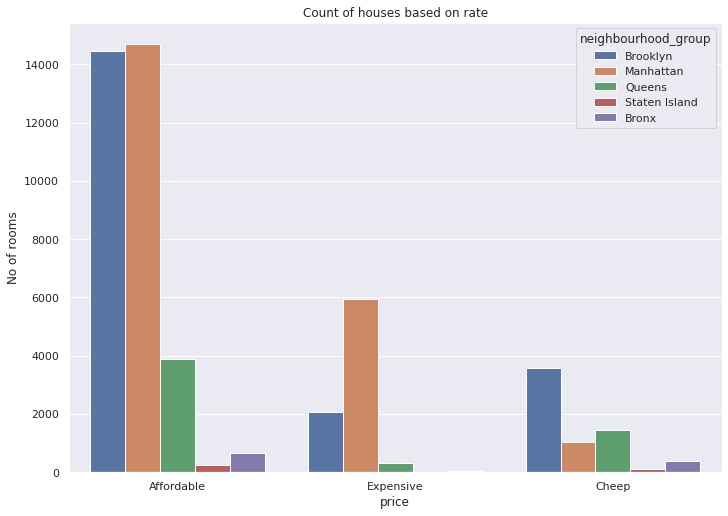

In [357]:
'''
dividing price range in 3 groups 
1) cheep i.e price below 50
2) affordable i.e price betwenn 50 & 200
3) expensive i.e price above 200
'''
def price_catagory(price):
  if price<=50:
    return 'Cheep'
  elif price>=50 and price<=200:
    return 'Affordable'
  else:
    return 'Expensive'
#creating a count plot 
sns.countplot(x=df.price.apply(price_catagory), hue=df.neighbourhood_group).set_title('Count of houses based on rate')
#adding y label to the plot
plt.ylabel('No of rooms') 
plt.show()

##13.5) Top 10 minimum_nights which gain max reviews per month 

In [358]:
# top 10 minimum_nights which gain reviews
review_min_nights=df.groupby('minimum_nights').agg({'reviews_per_month':'sum'}).reset_index().sort_values(['reviews_per_month'],ascending=False)[:10]

Text(0, 0.5, 'Total Review per month')

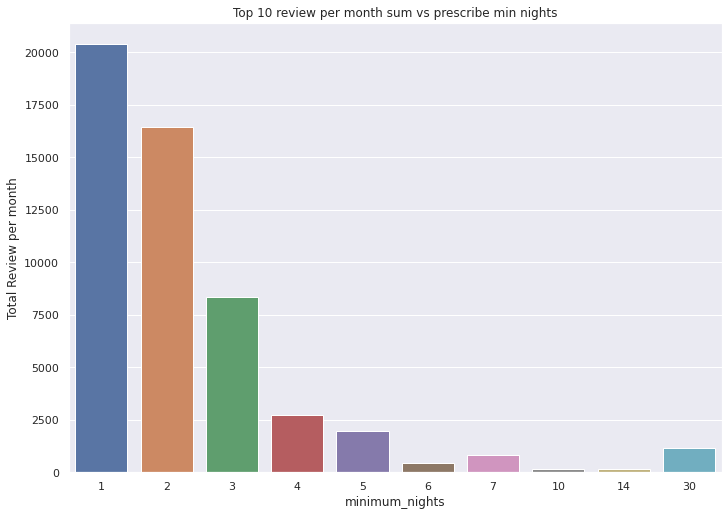

In [359]:
sns.barplot(x='minimum_nights',y='reviews_per_month',data=review_min_nights).set_title('Top 10 review per month sum vs prescribe min nights')
plt.ylabel('Total Review per month')

Observations

The rooms with min number of days between 1 and 4 earn max reviews


Text(0, 0.5, 'Review per month * min nights')

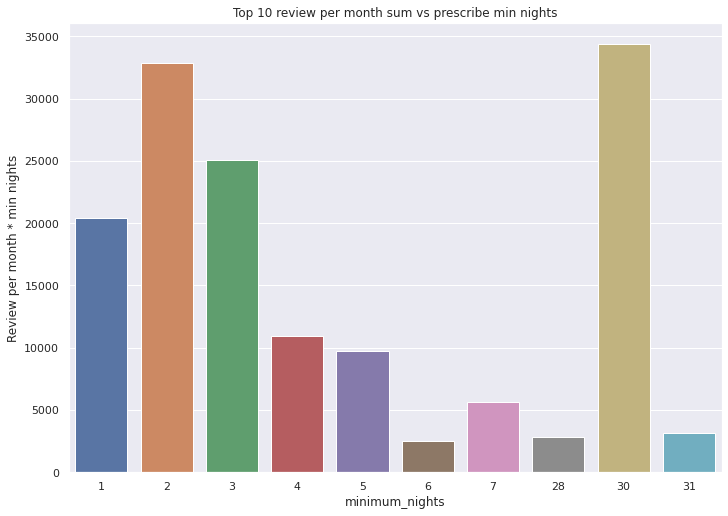

In [360]:
review_min_nights1=df.groupby('minimum_nights').agg({'reviews_per_month':'sum'}).reset_index()
review_min_nights1['reviews_per_month']=review_min_nights1['reviews_per_month']*review_min_nights1['minimum_nights']
review_min_nights1=review_min_nights1.sort_values(['reviews_per_month'],ascending=False)[:10]
sns.barplot(x='minimum_nights',y='reviews_per_month',data=review_min_nights1).set_title('Top 10 review per month sum vs prescribe min nights')
plt.ylabel('Review per month * min nights')


Observations

The rooms with min number of days 1,2,3,30 earn max reviews of we multipy the min nights with the total rev per month
